In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
import autoreload
import evotsc
import evotsc_plot
autoreload.reload(evotsc)
autoreload.reload(evotsc_plot)

<module 'evotsc_plot' from '/Users/theotime/Work/Code/EvoTSC/evotsc_plot.py'>

In [4]:
# Constants
intergene = 1000
interaction_dist = 2500
interaction_coef = 0.3
default_basal_expression = 1.0
nb_eval_steps=51
beta_A = 0.15
beta_B = 0.30
nb_genes = 60
nb_indivs = 100
inversion_prob=0.75

In [5]:
init_genes = evotsc.Gene.generate(intergene=intergene,
                                  nb_genes=nb_genes,
                                  default_basal_expression=default_basal_expression)

In [6]:
init_indiv = evotsc.Individual(genes=init_genes,
                               interaction_dist=interaction_dist,
                               interaction_coef=interaction_coef,
                               nb_eval_steps=nb_eval_steps,
                               beta_A=beta_A,
                               beta_B=beta_B)

In [7]:
mutation = evotsc.Mutation(intergene_mutation_prob=0.0,
                           intergene_mutation_var=0.0,
                           inversion_prob=inversion_prob)

Fitness: 4.1476e-80
Environment A
  A & B genes: 13 on, 7 off
  A genes:     15 on, 5 off
  B genes:     16 on, 4 off
Environment B
  A & B genes: 14 on, 6 off
  A genes:     19 on, 1 off
  B genes:     17 on, 3 off


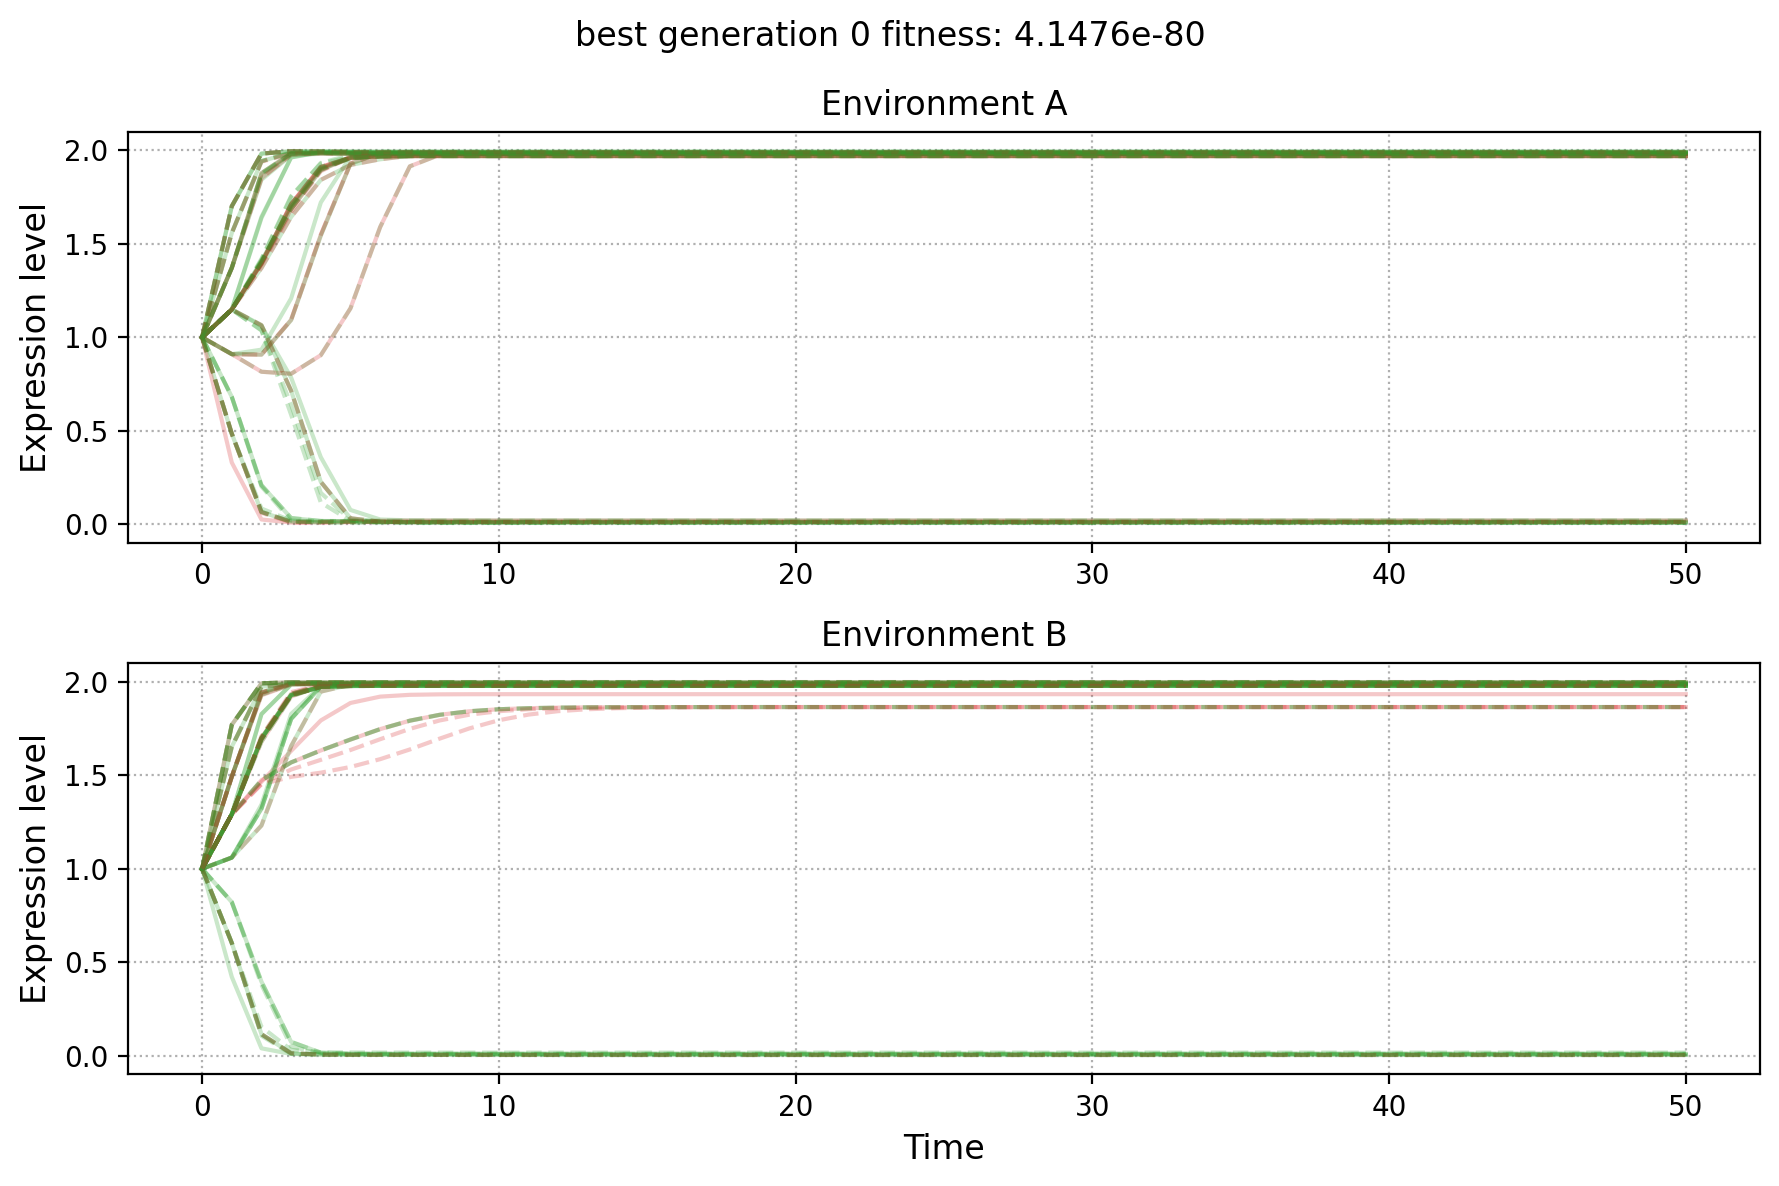

In [8]:
evotsc_plot.plot_expr_AB(indiv=init_indiv, plot_title='best generation 0', plot_name=f'best generation {0:05}')
evotsc_plot.explain(init_indiv)

In [9]:
population = evotsc.Population(init_indiv=init_indiv, nb_indivs=nb_indivs, mutation=mutation)

In [10]:
step = 50

Generation 00000: best fit 4.1476e-80, avg fit 4.1476e-80
Fitness: 4.1476e-80
Environment A
  A & B genes: 13 on, 7 off
  A genes:     15 on, 5 off
  B genes:     16 on, 4 off
Environment B
  A & B genes: 14 on, 6 off
  A genes:     19 on, 1 off
  B genes:     17 on, 3 off

Generation 00010: best fit 7.3396e-50, avg fit 1.1867e-51
Generation 00020: best fit 1.0431e-44, avg fit 1.3905e-46
Generation 00030: best fit 5.7573e-41, avg fit 1.1455e-41
Generation 00040: best fit 2.3512e-39, avg fit 1.0358e-39
Generation 00050: best fit 2.7619e-39, avg fit 1.0698e-39
Fitness: 2.7619e-39
Environment A
  A & B genes: 20 on, 0 off
  A genes:     9 on, 11 off
  B genes:     2 on, 18 off
Environment B
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     16 on, 4 off

Generation 00060: best fit 6.367e-38, avg fit 3.051e-38
Generation 00070: best fit 2.1759e-36, avg fit 1.0309e-36
Generation 00080: best fit 2.616e-36, avg fit 9.756e-37
Generation 00090: best fit 2.616e-36, avg fit 1

Generation 00810: best fit 7.6756e-32, avg fit 3.6159e-32
Generation 00820: best fit 7.6756e-32, avg fit 3.698e-32
Generation 00830: best fit 7.6756e-32, avg fit 3.1887e-32
Generation 00840: best fit 7.6756e-32, avg fit 4.1493e-32
Generation 00850: best fit 7.6756e-32, avg fit 3.7644e-32
Fitness: 7.6756e-32
Environment A
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     2 on, 18 off
Environment B
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     20 on, 0 off

Generation 00860: best fit 7.6756e-32, avg fit 3.5437e-32
Generation 00870: best fit 8.1282e-32, avg fit 3.5004e-32
Generation 00880: best fit 7.9932e-32, avg fit 3.9348e-32
Generation 00890: best fit 7.9932e-32, avg fit 3.3804e-32
Generation 00900: best fit 7.9932e-32, avg fit 3.1636e-32
Fitness: 7.9932e-32
Environment A
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     2 on, 18 off
Environment B
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:  

/Users/theotime/Work/Code/EvoTSC/evotsc_plot.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9, 6), dpi=200)


Fitness: 3.48e-31
Environment A
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     2 on, 18 off
Environment B
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     20 on, 0 off



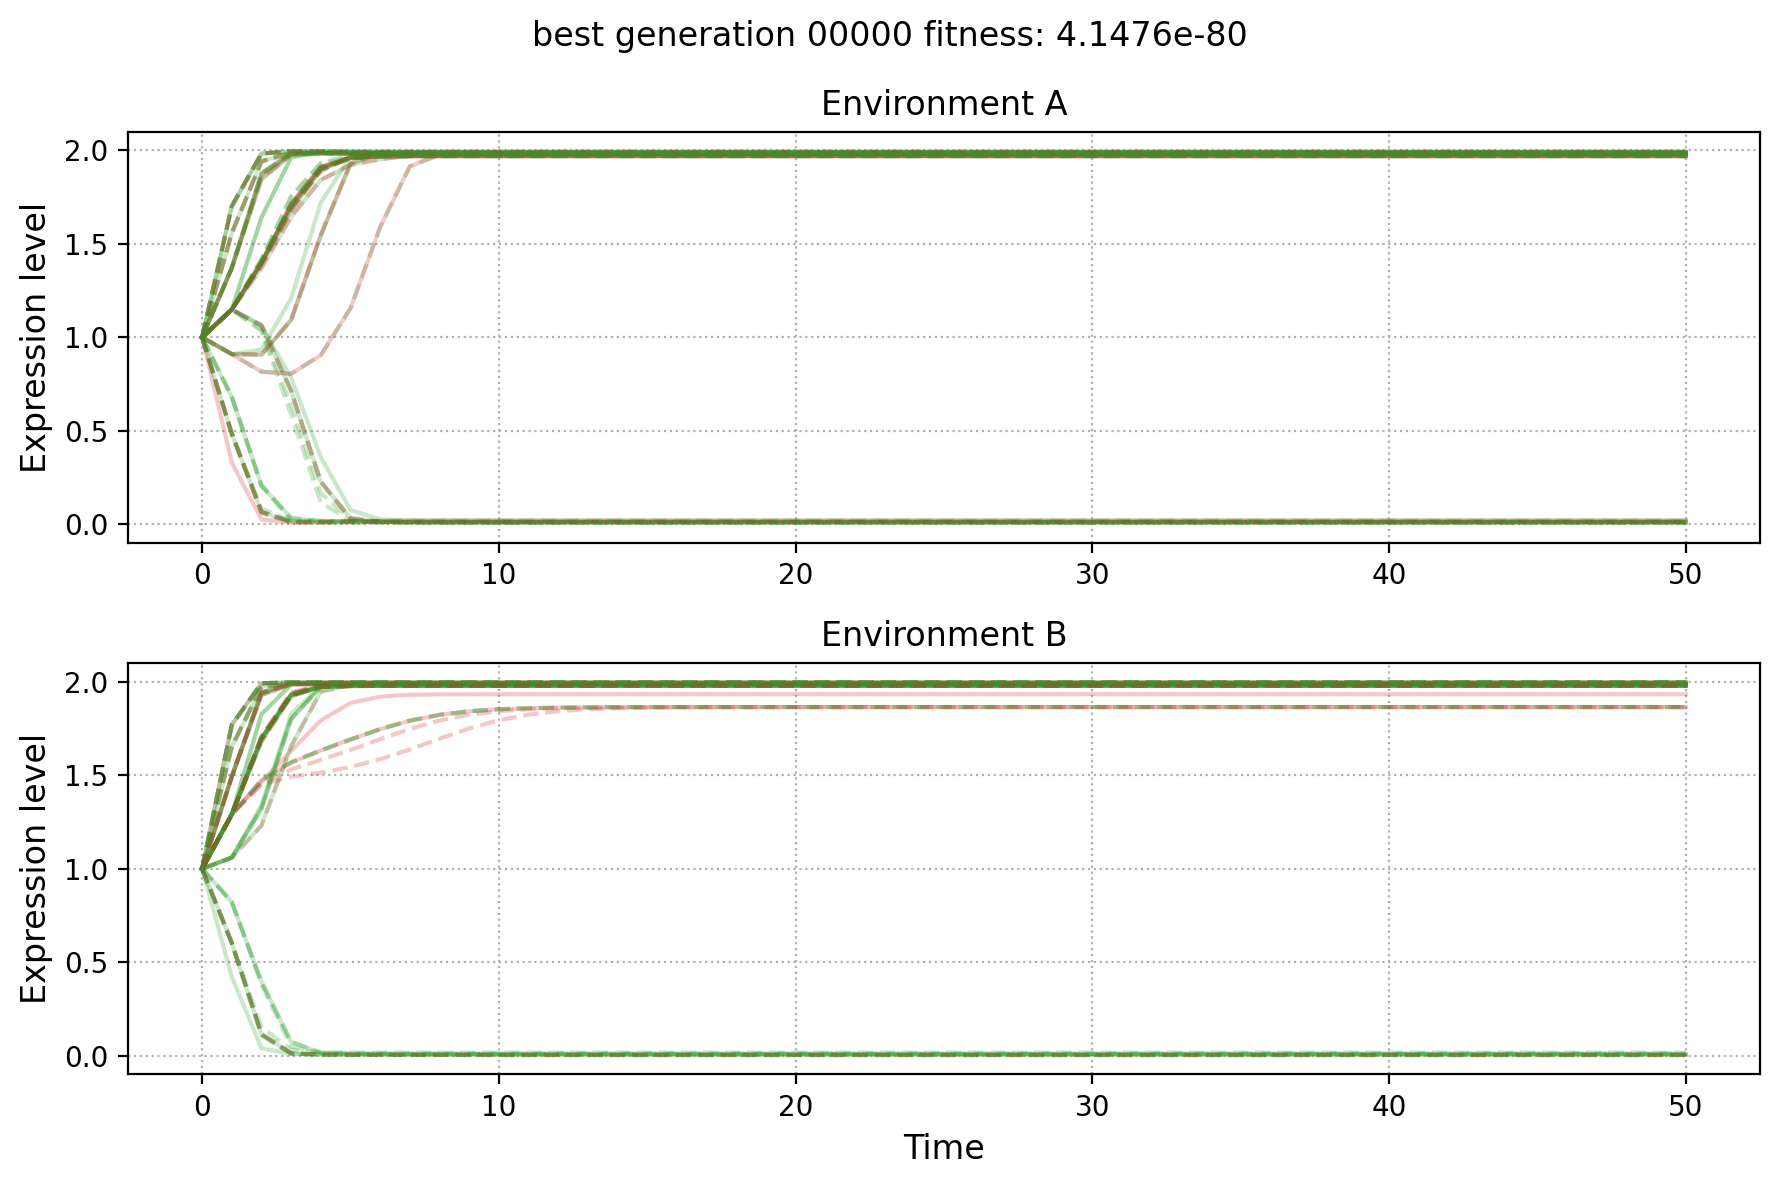

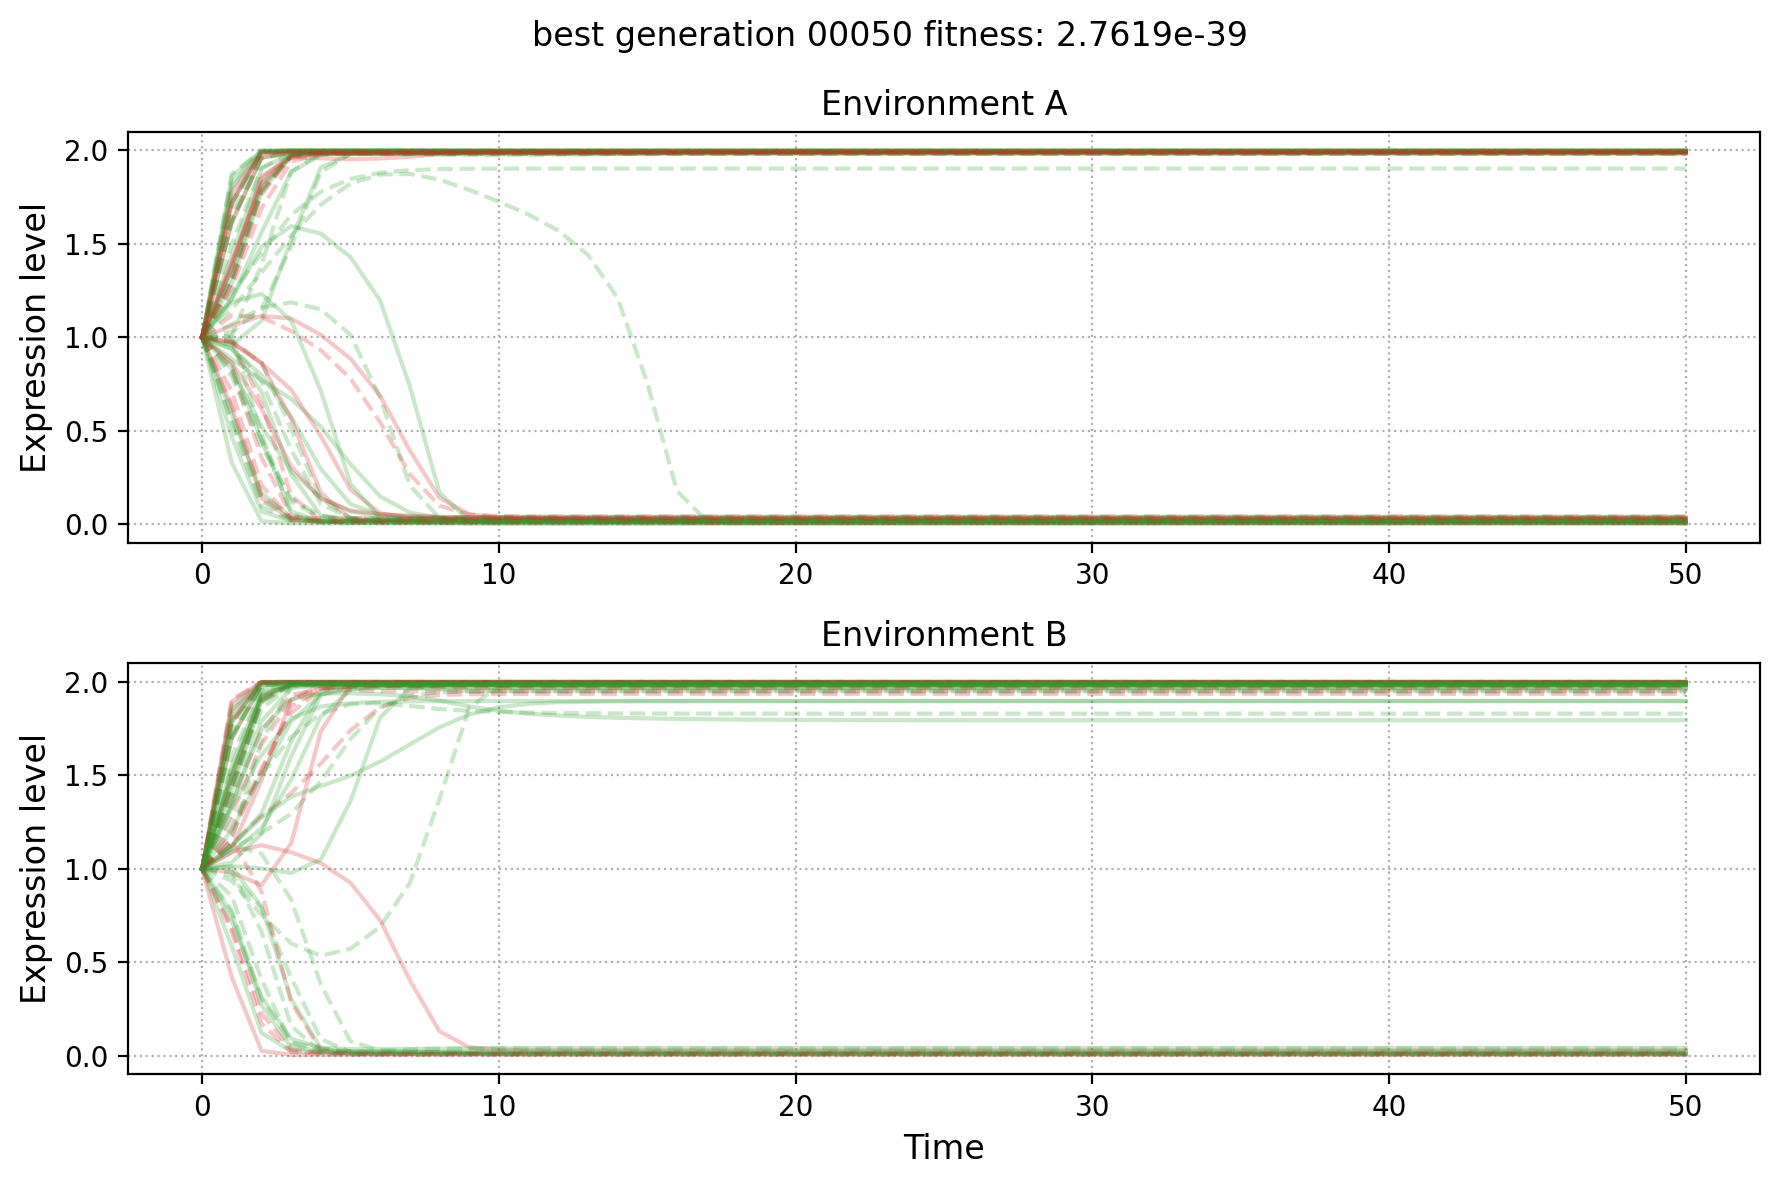

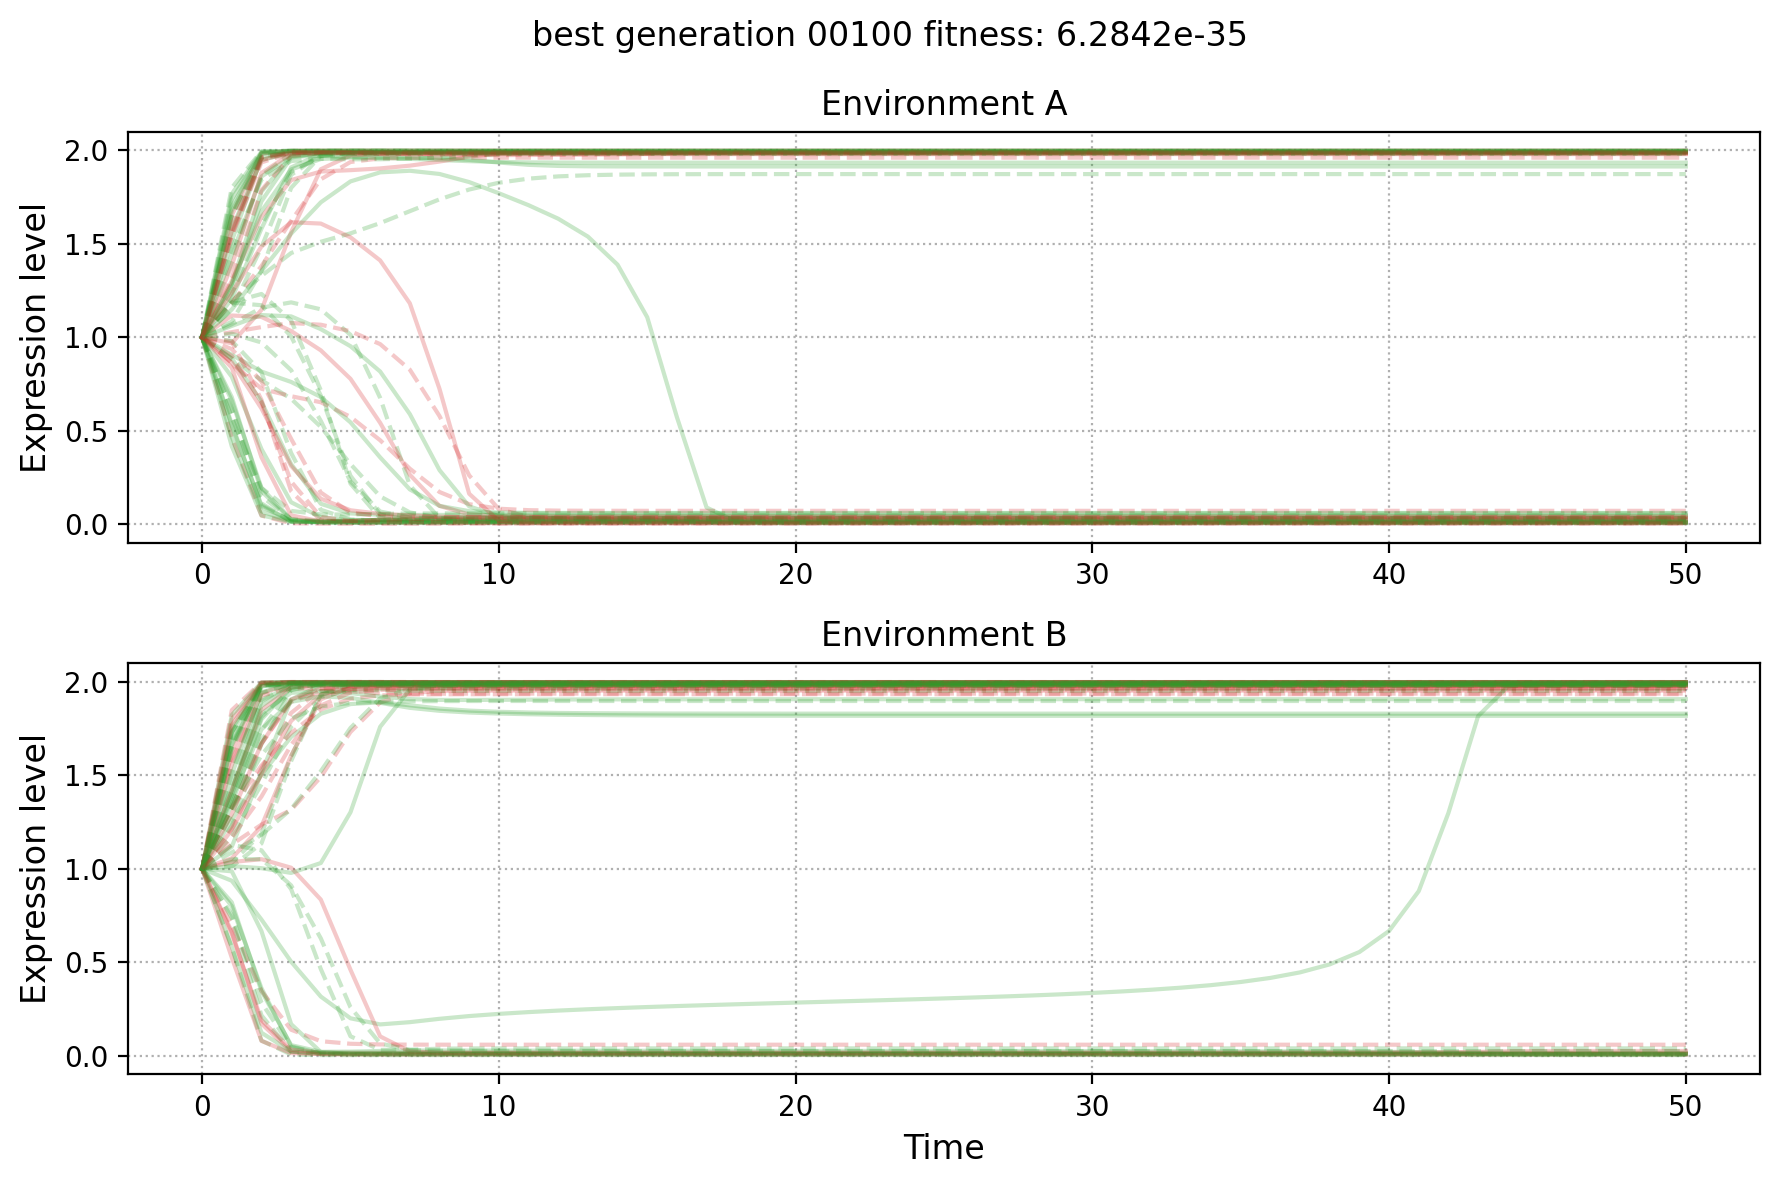

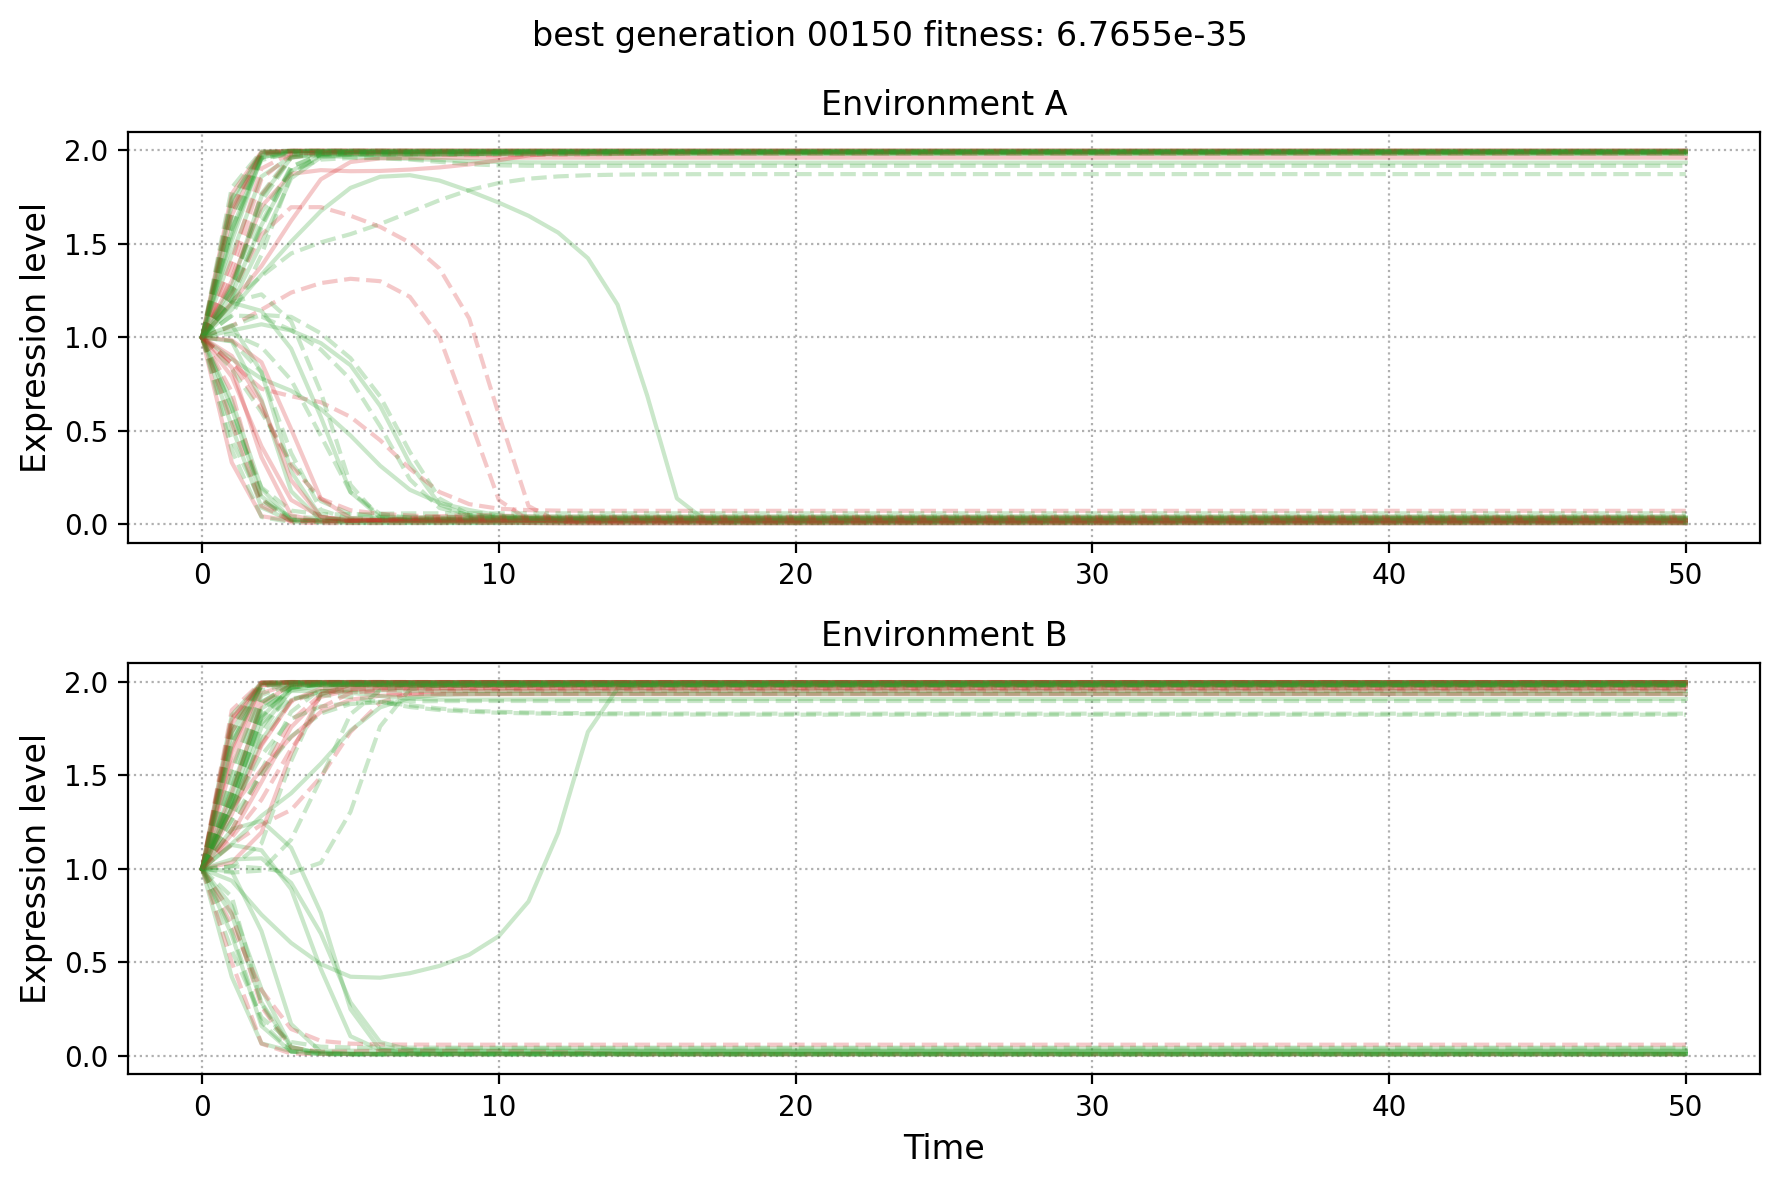

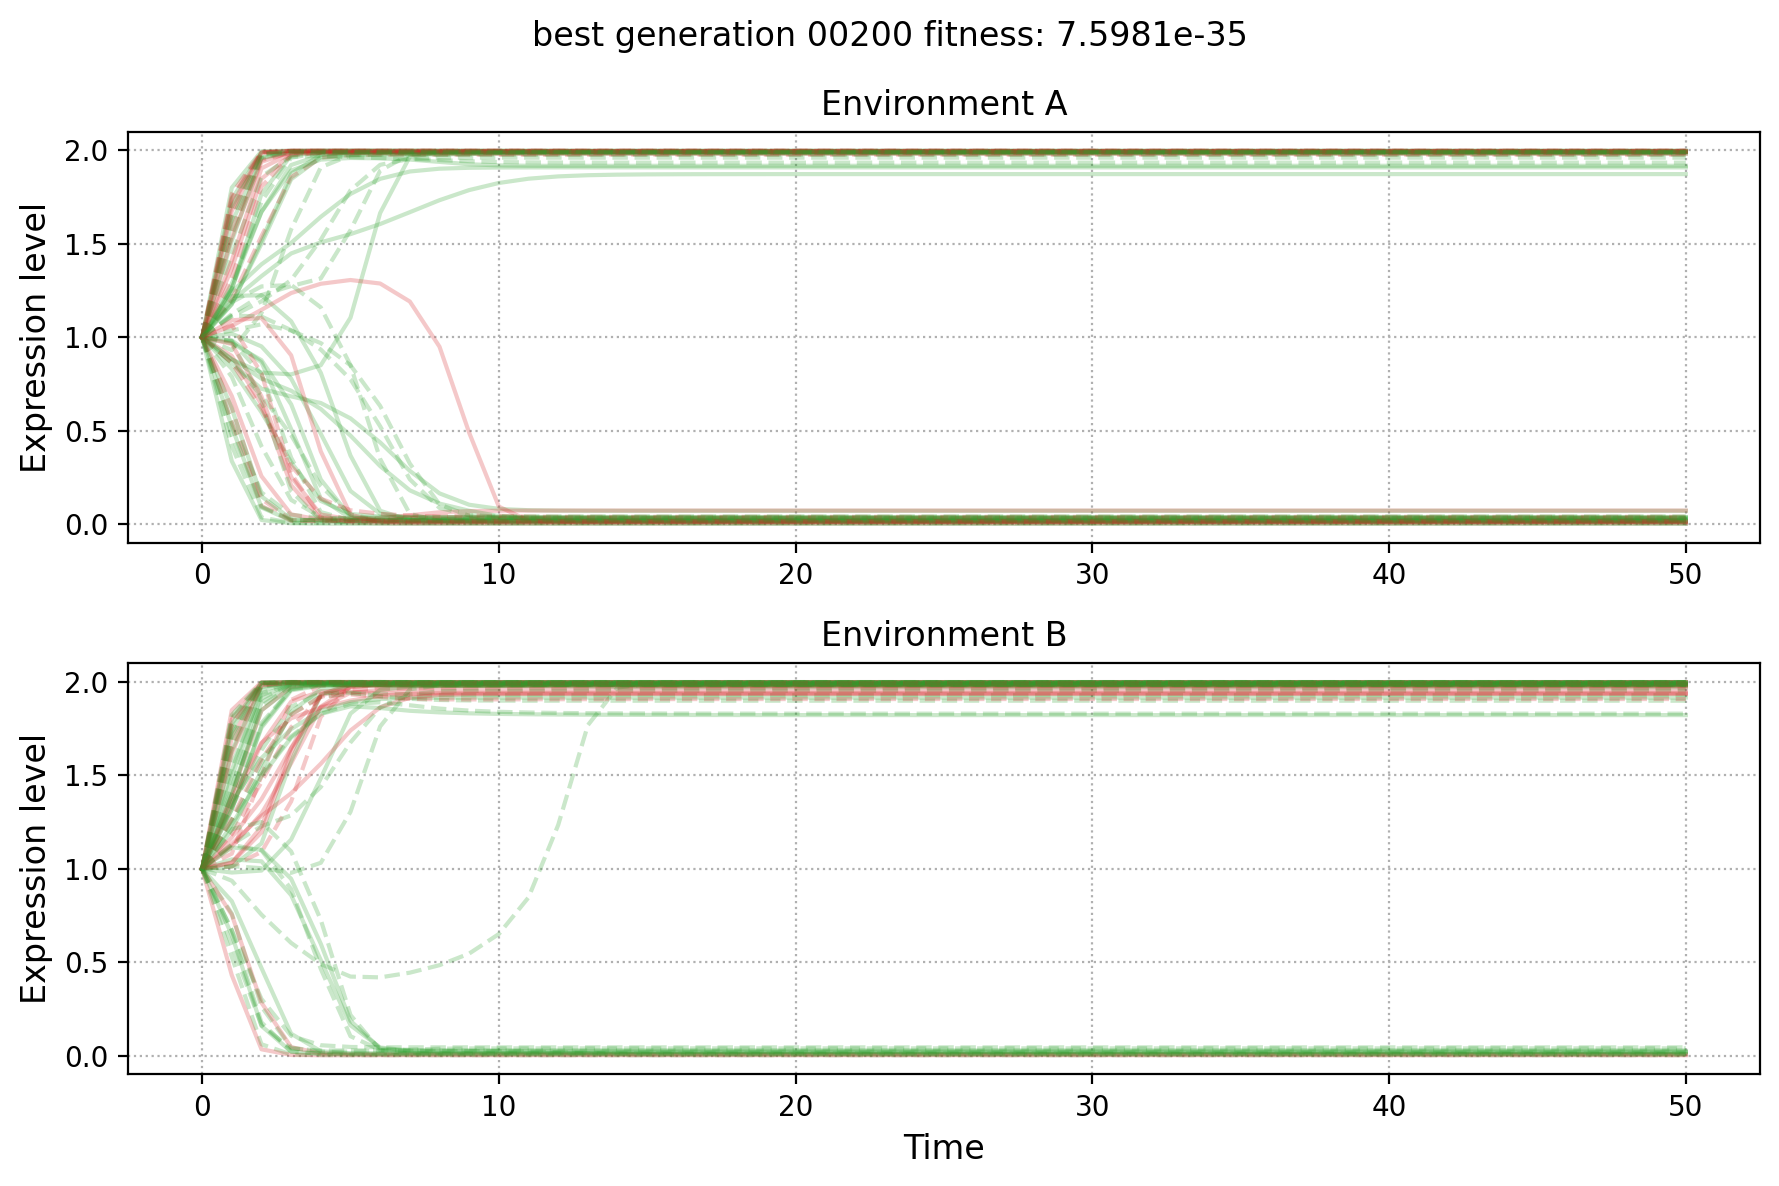

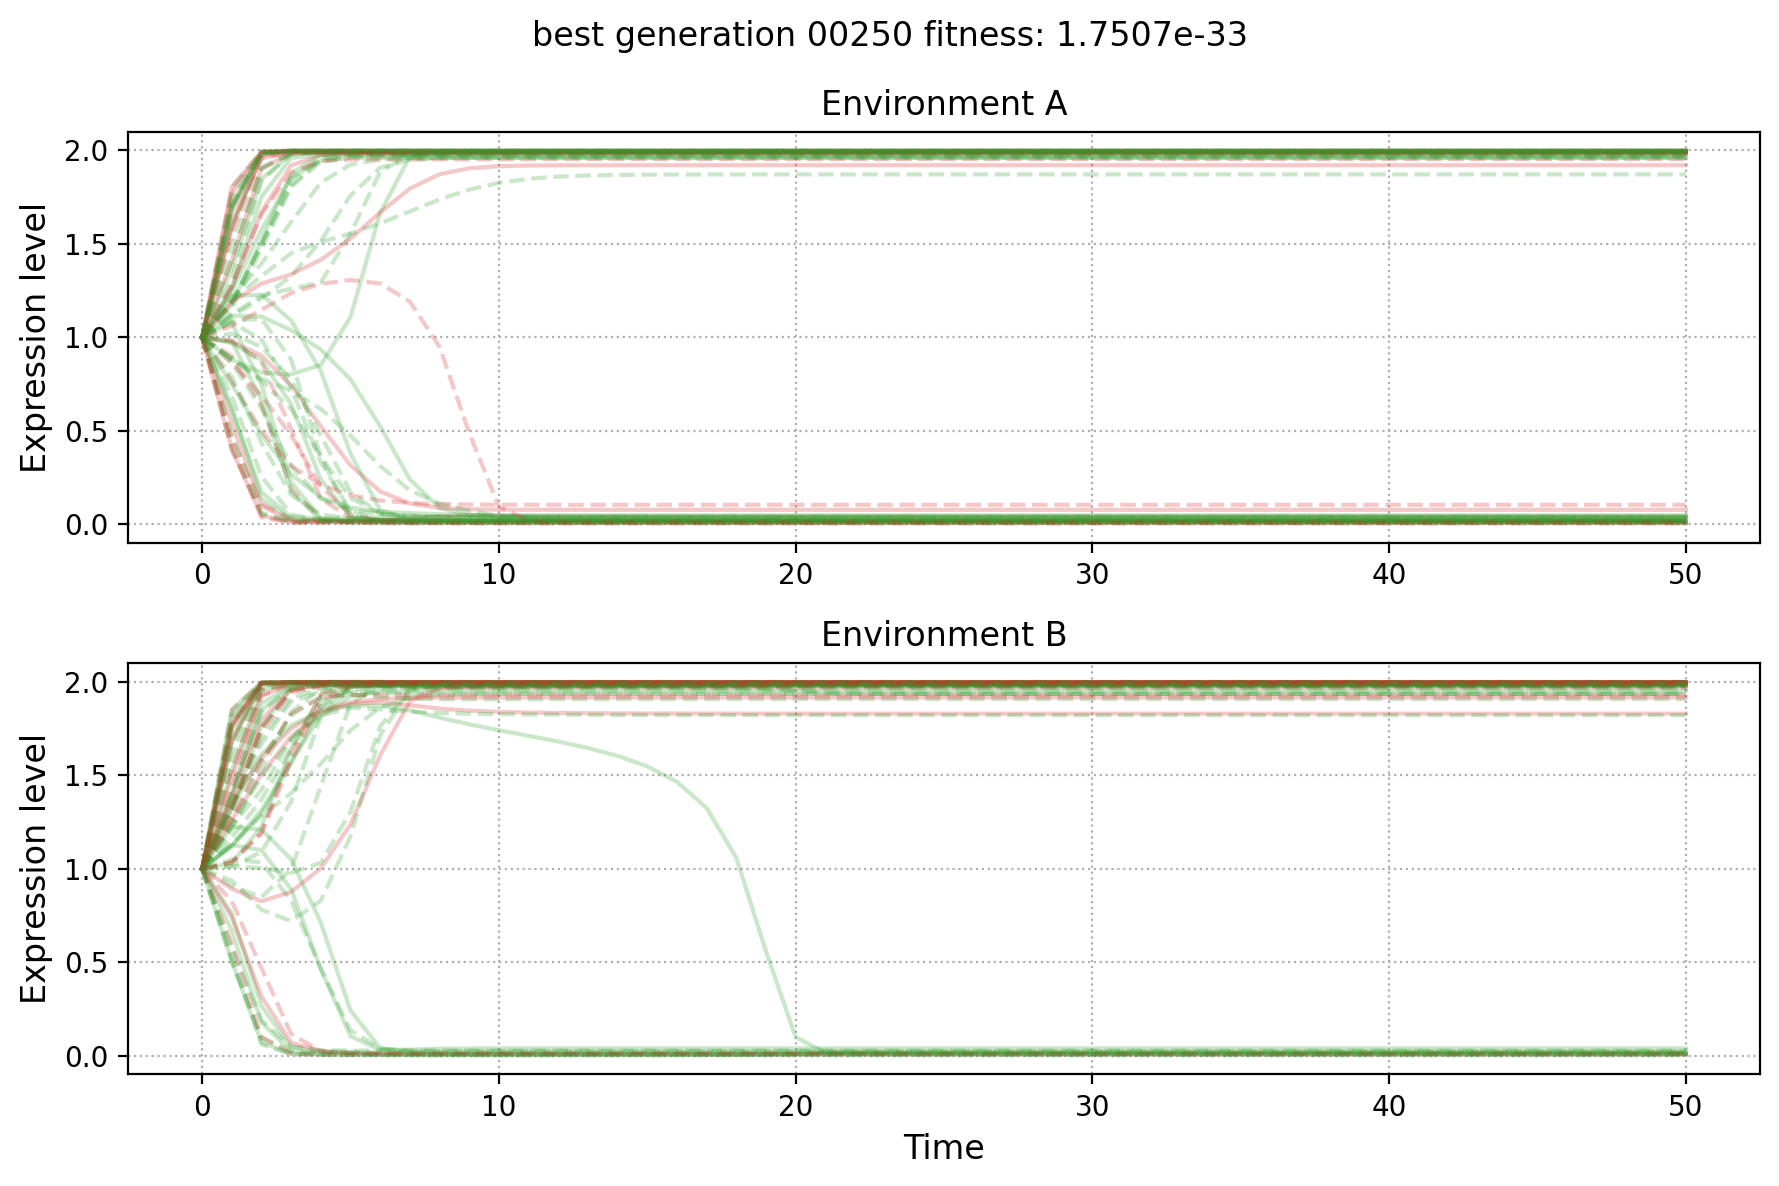

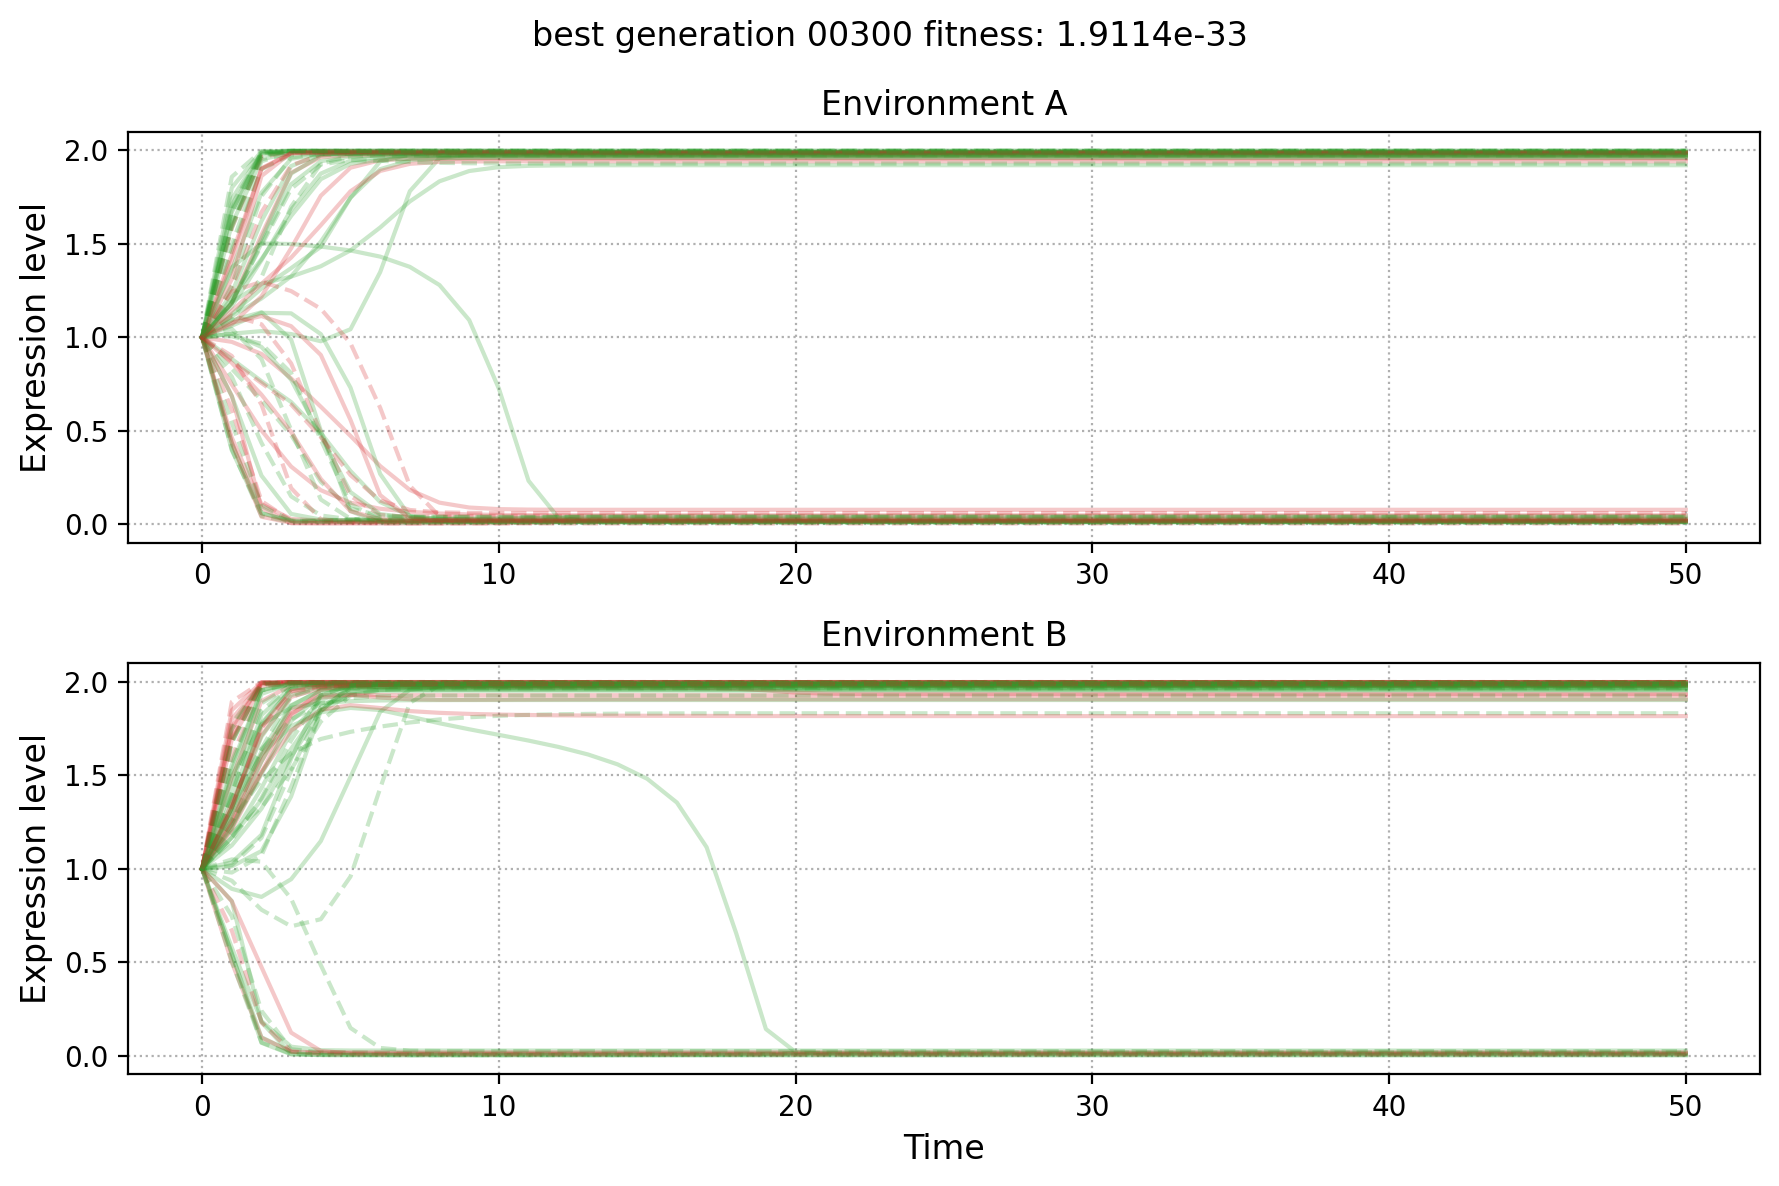

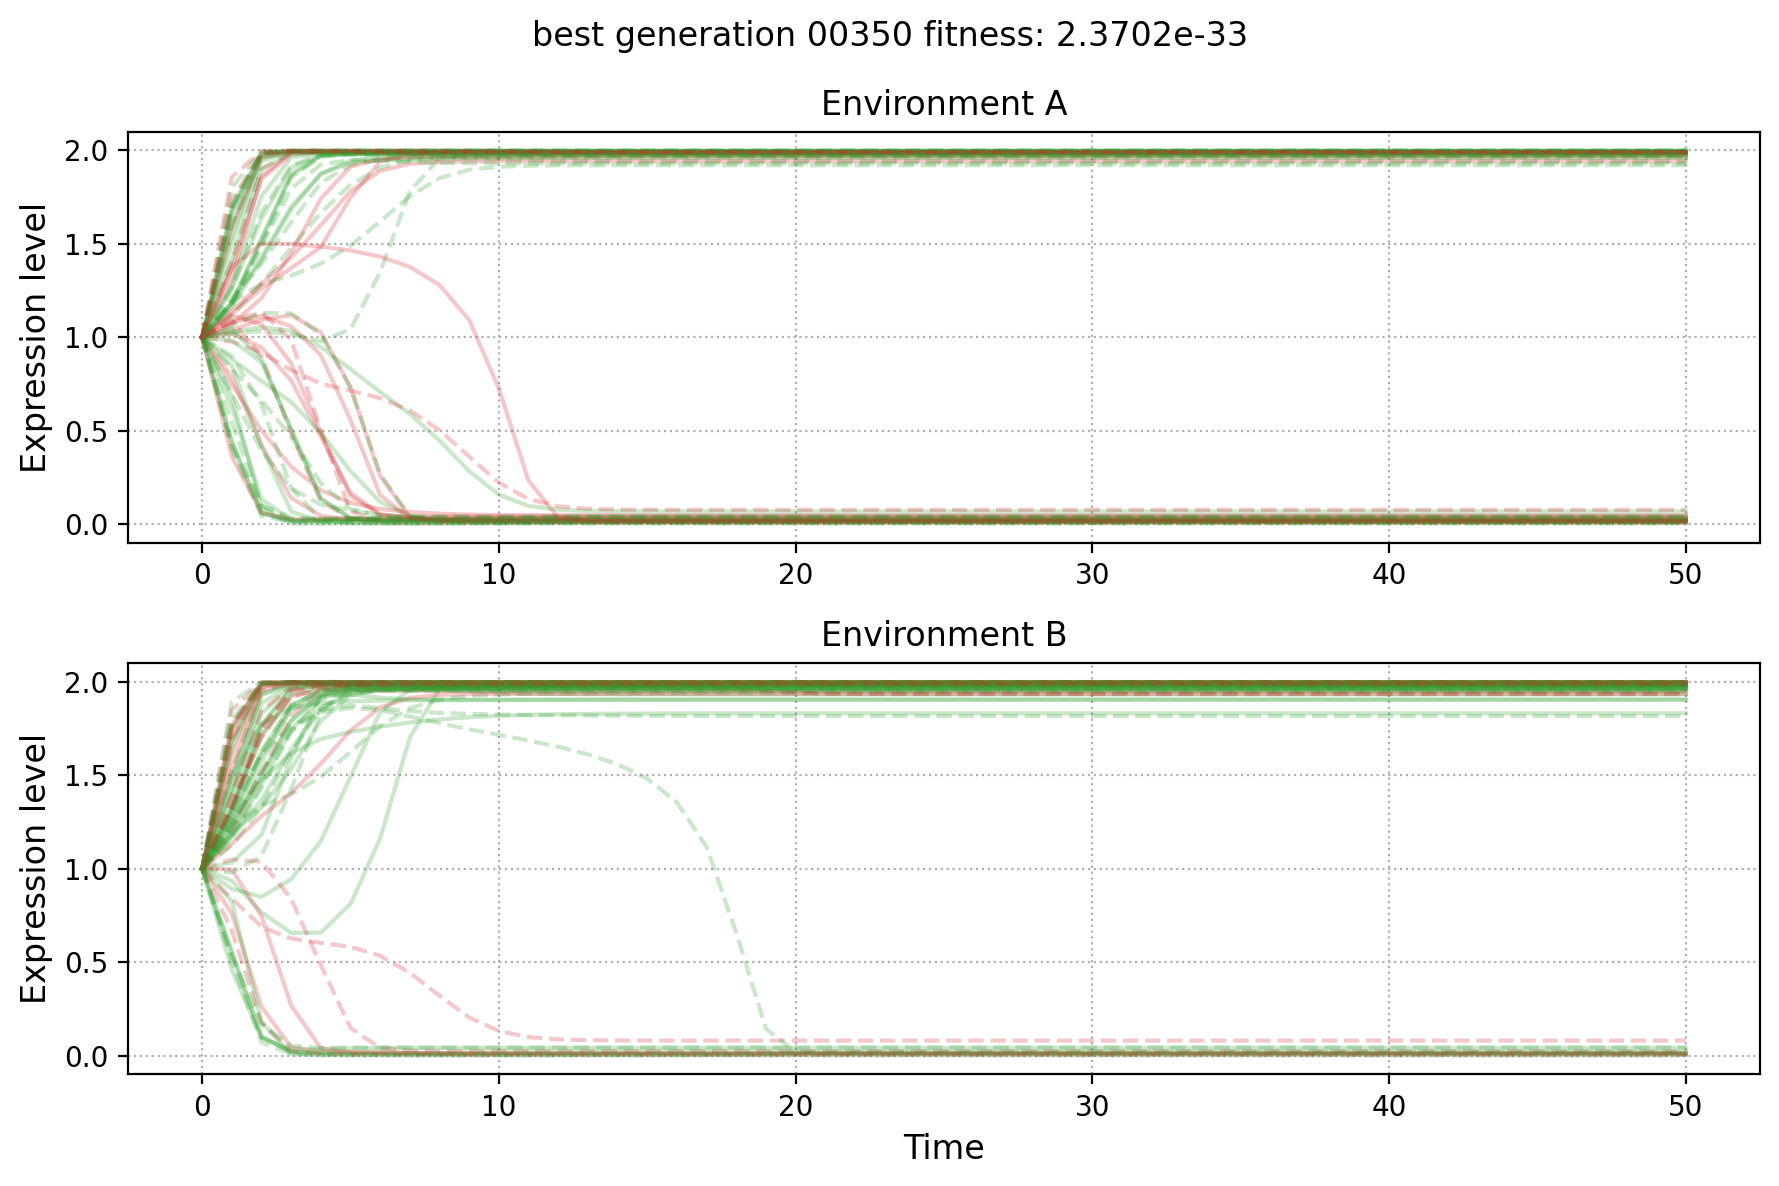

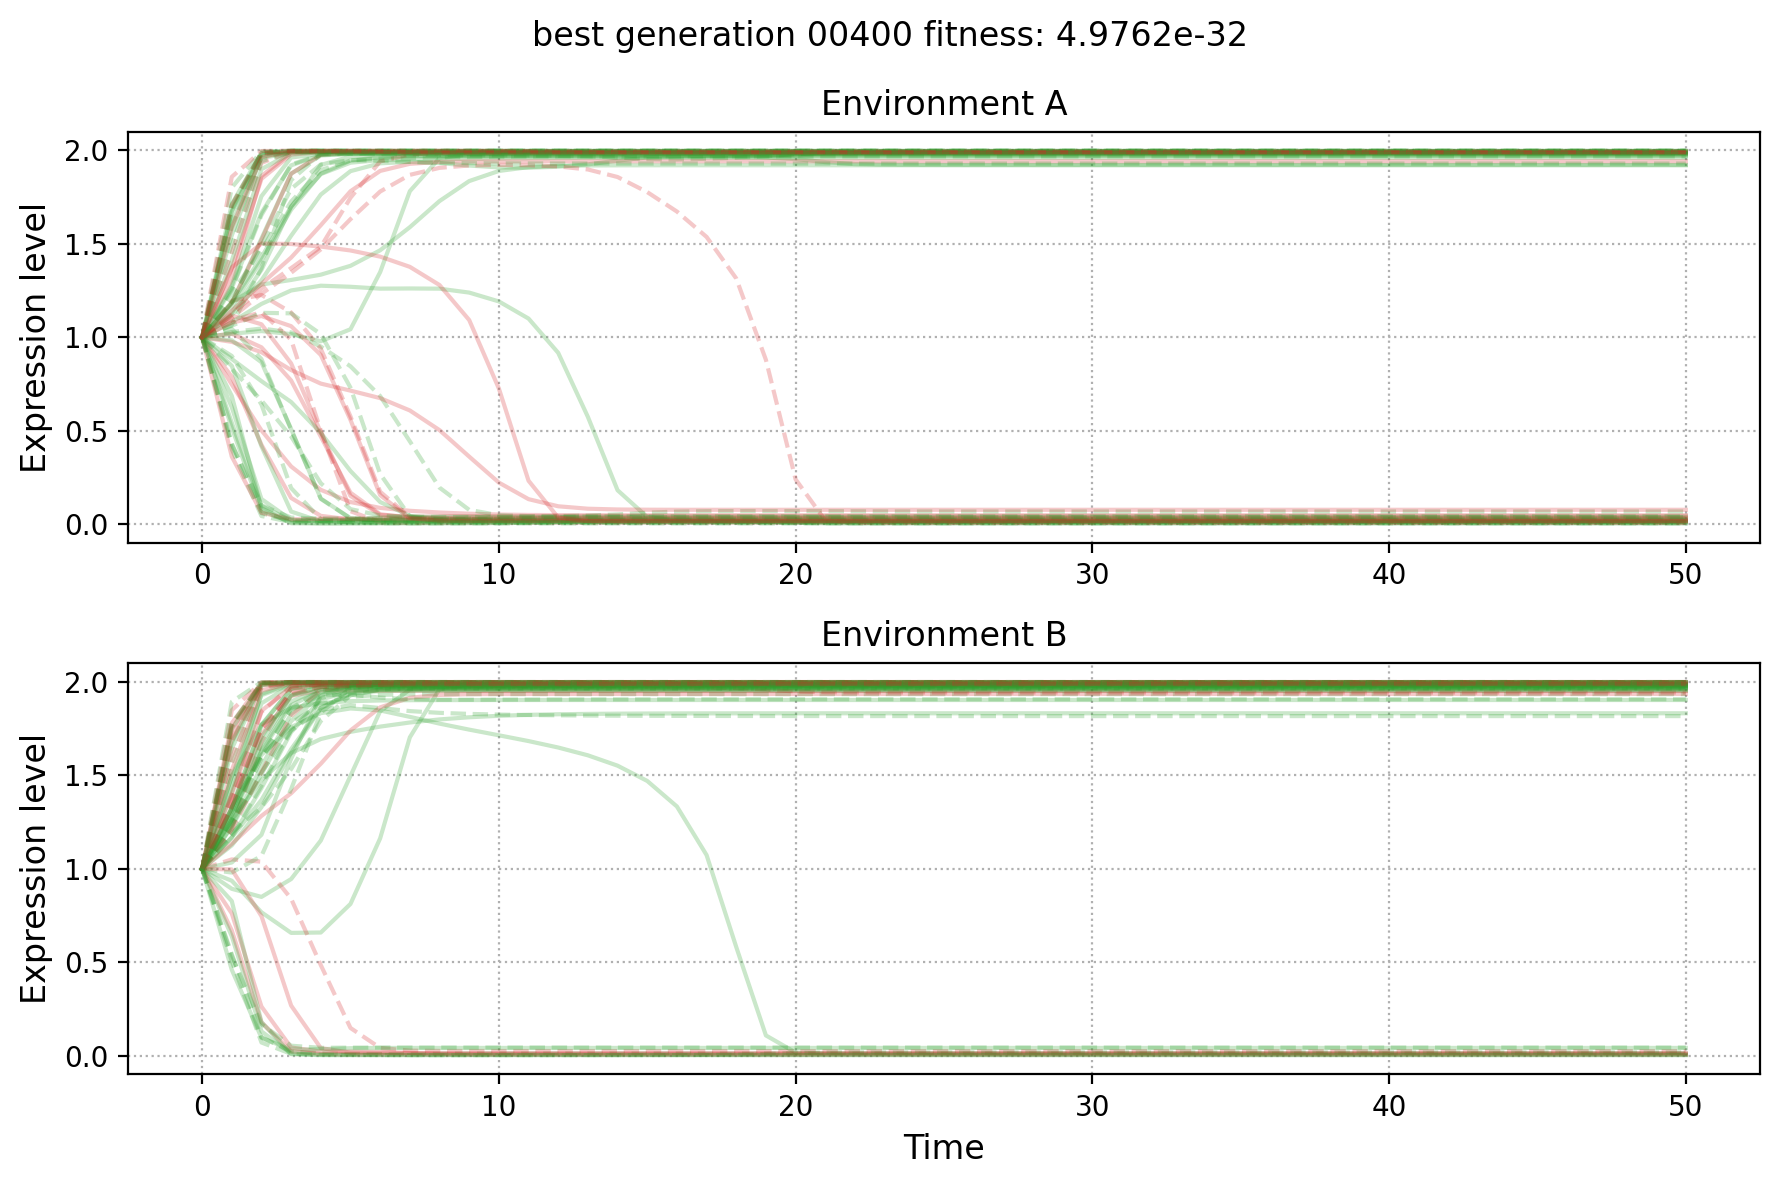

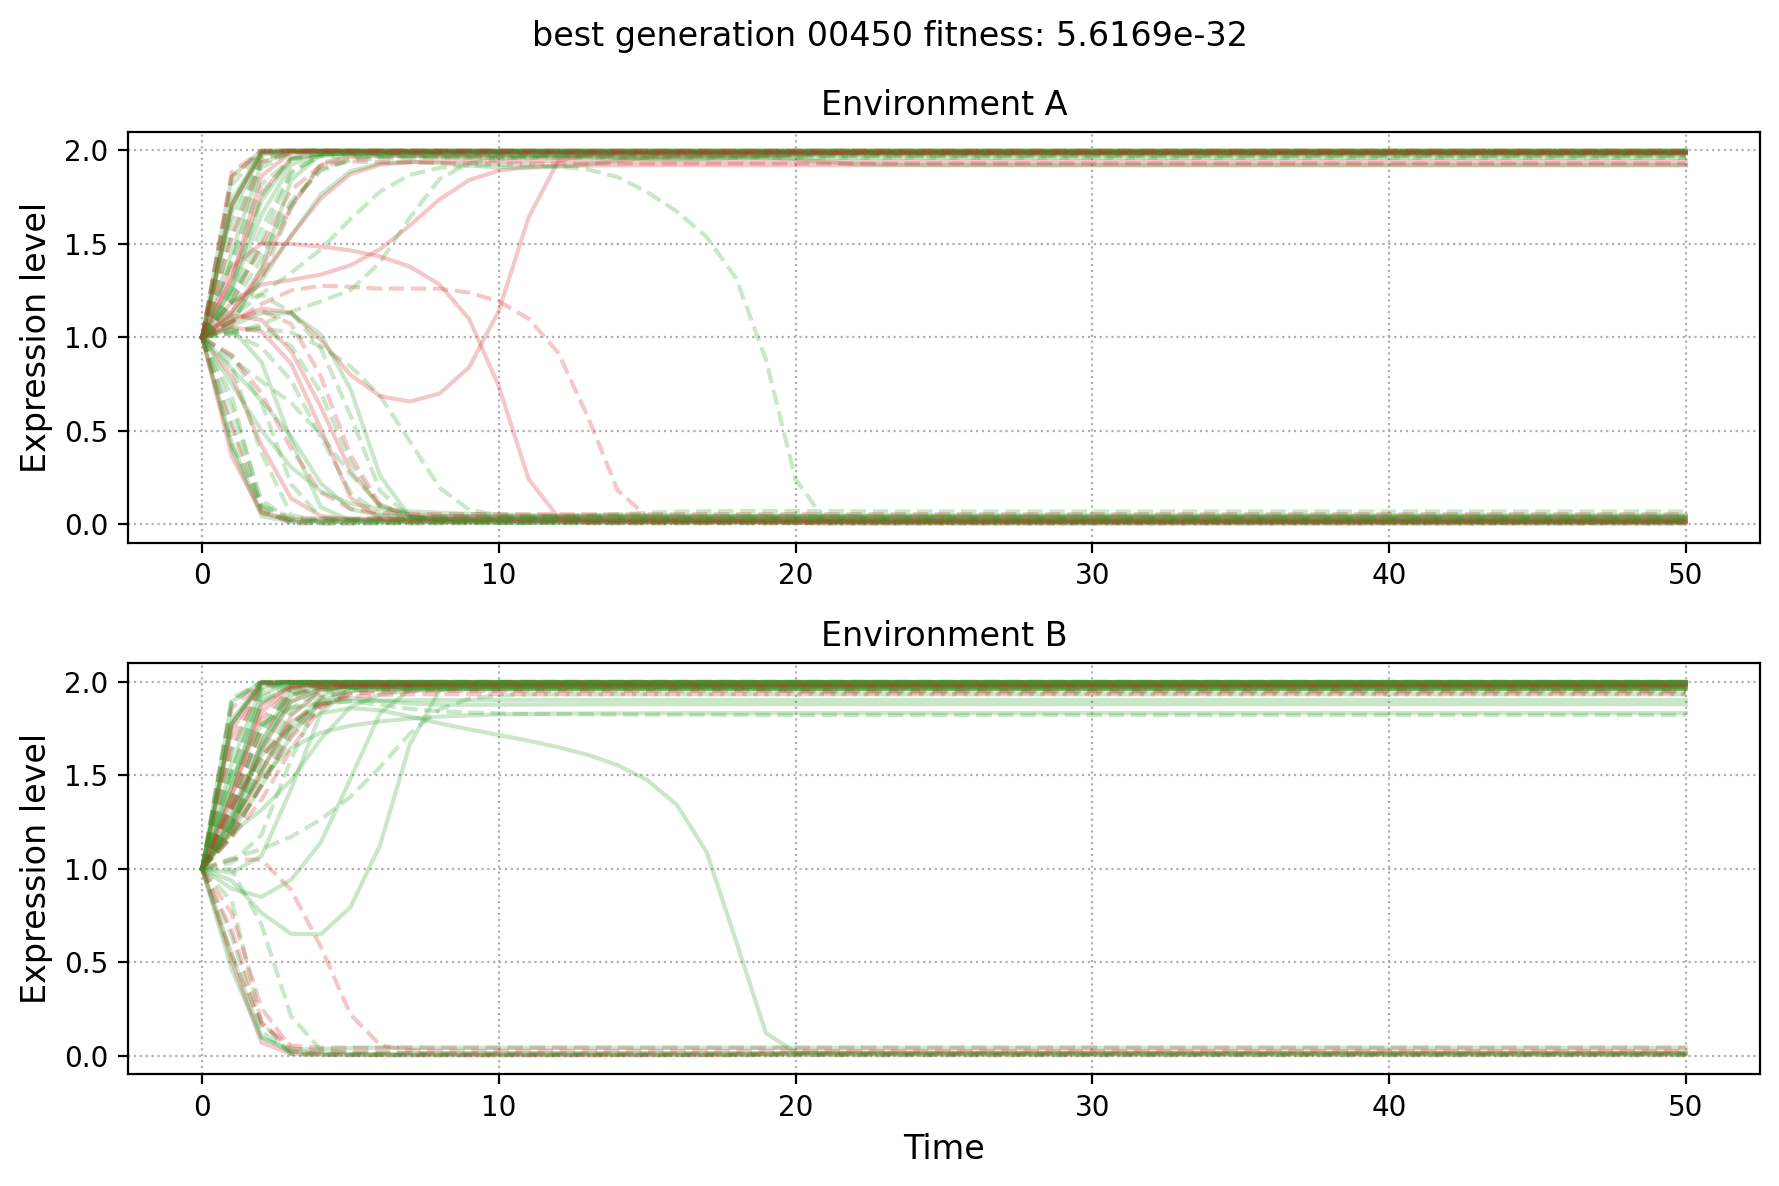

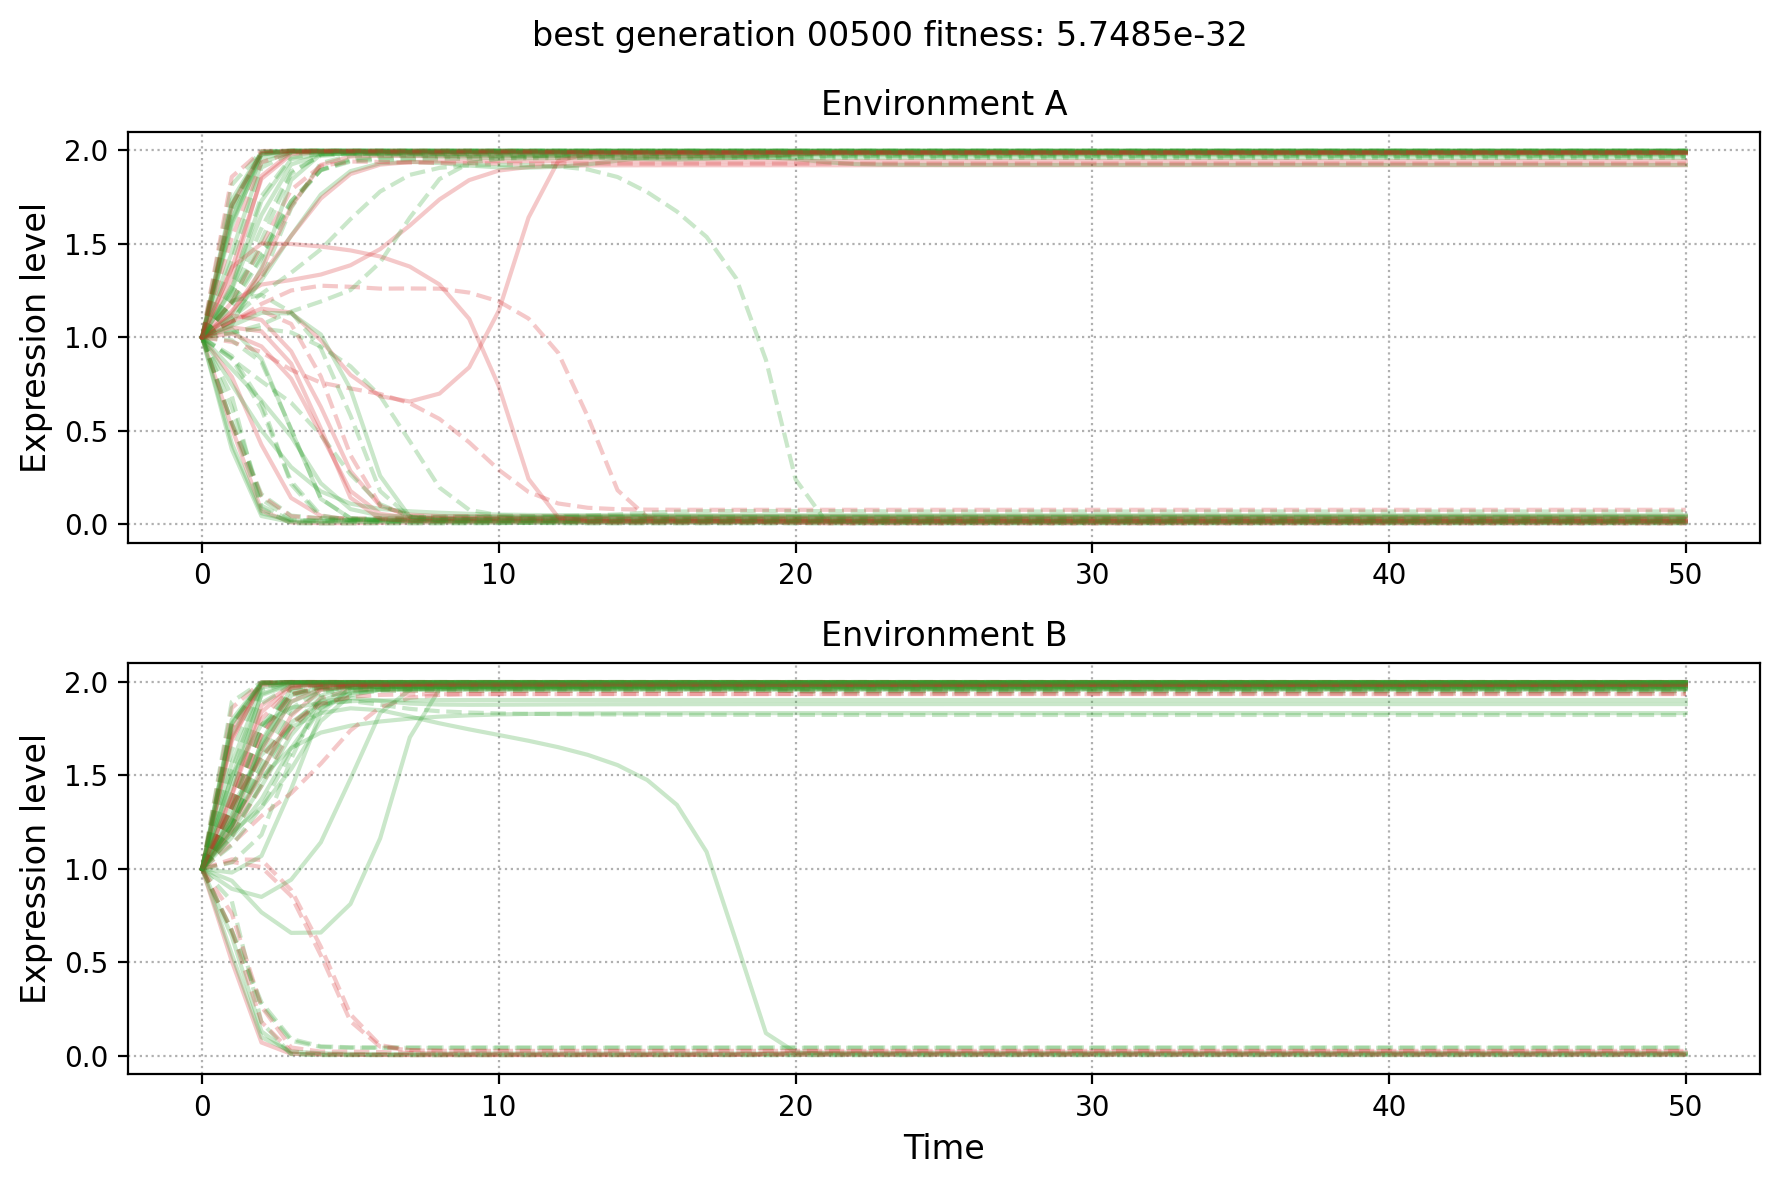

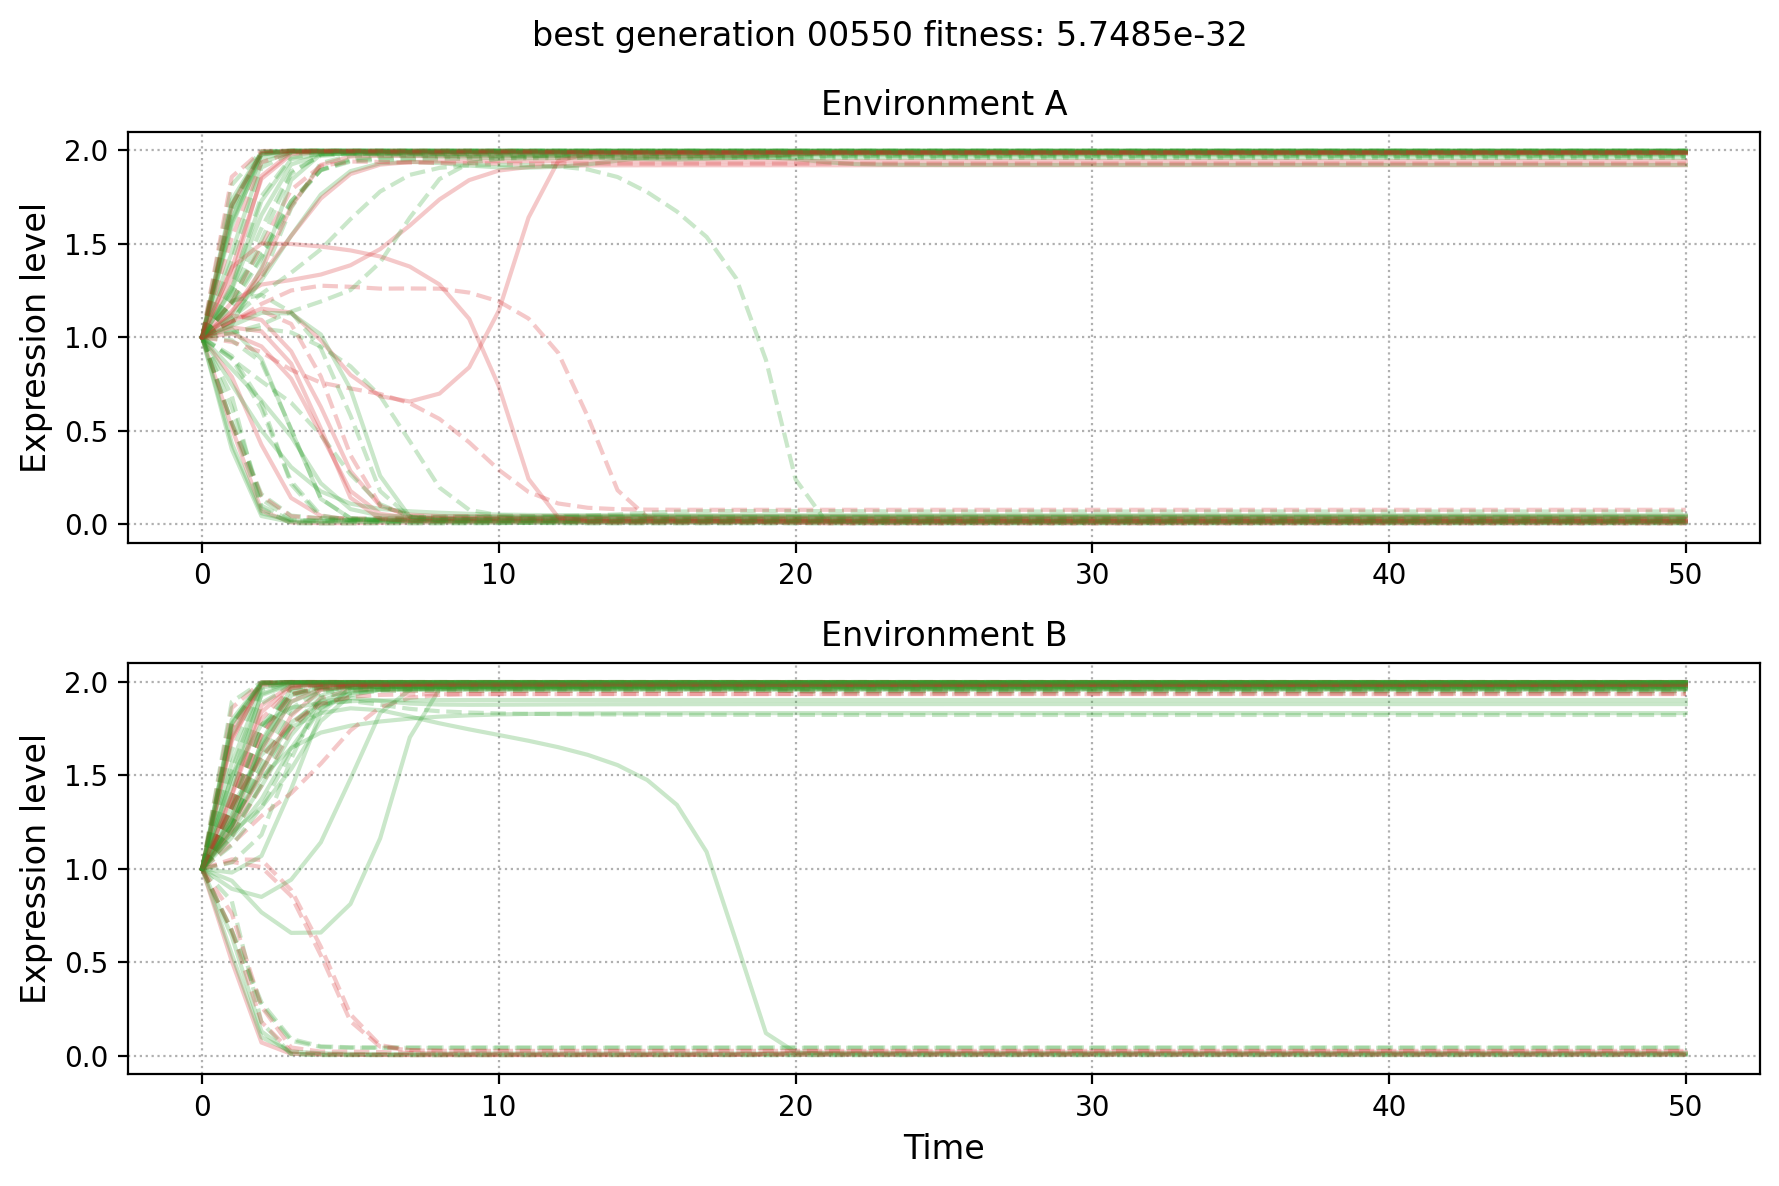

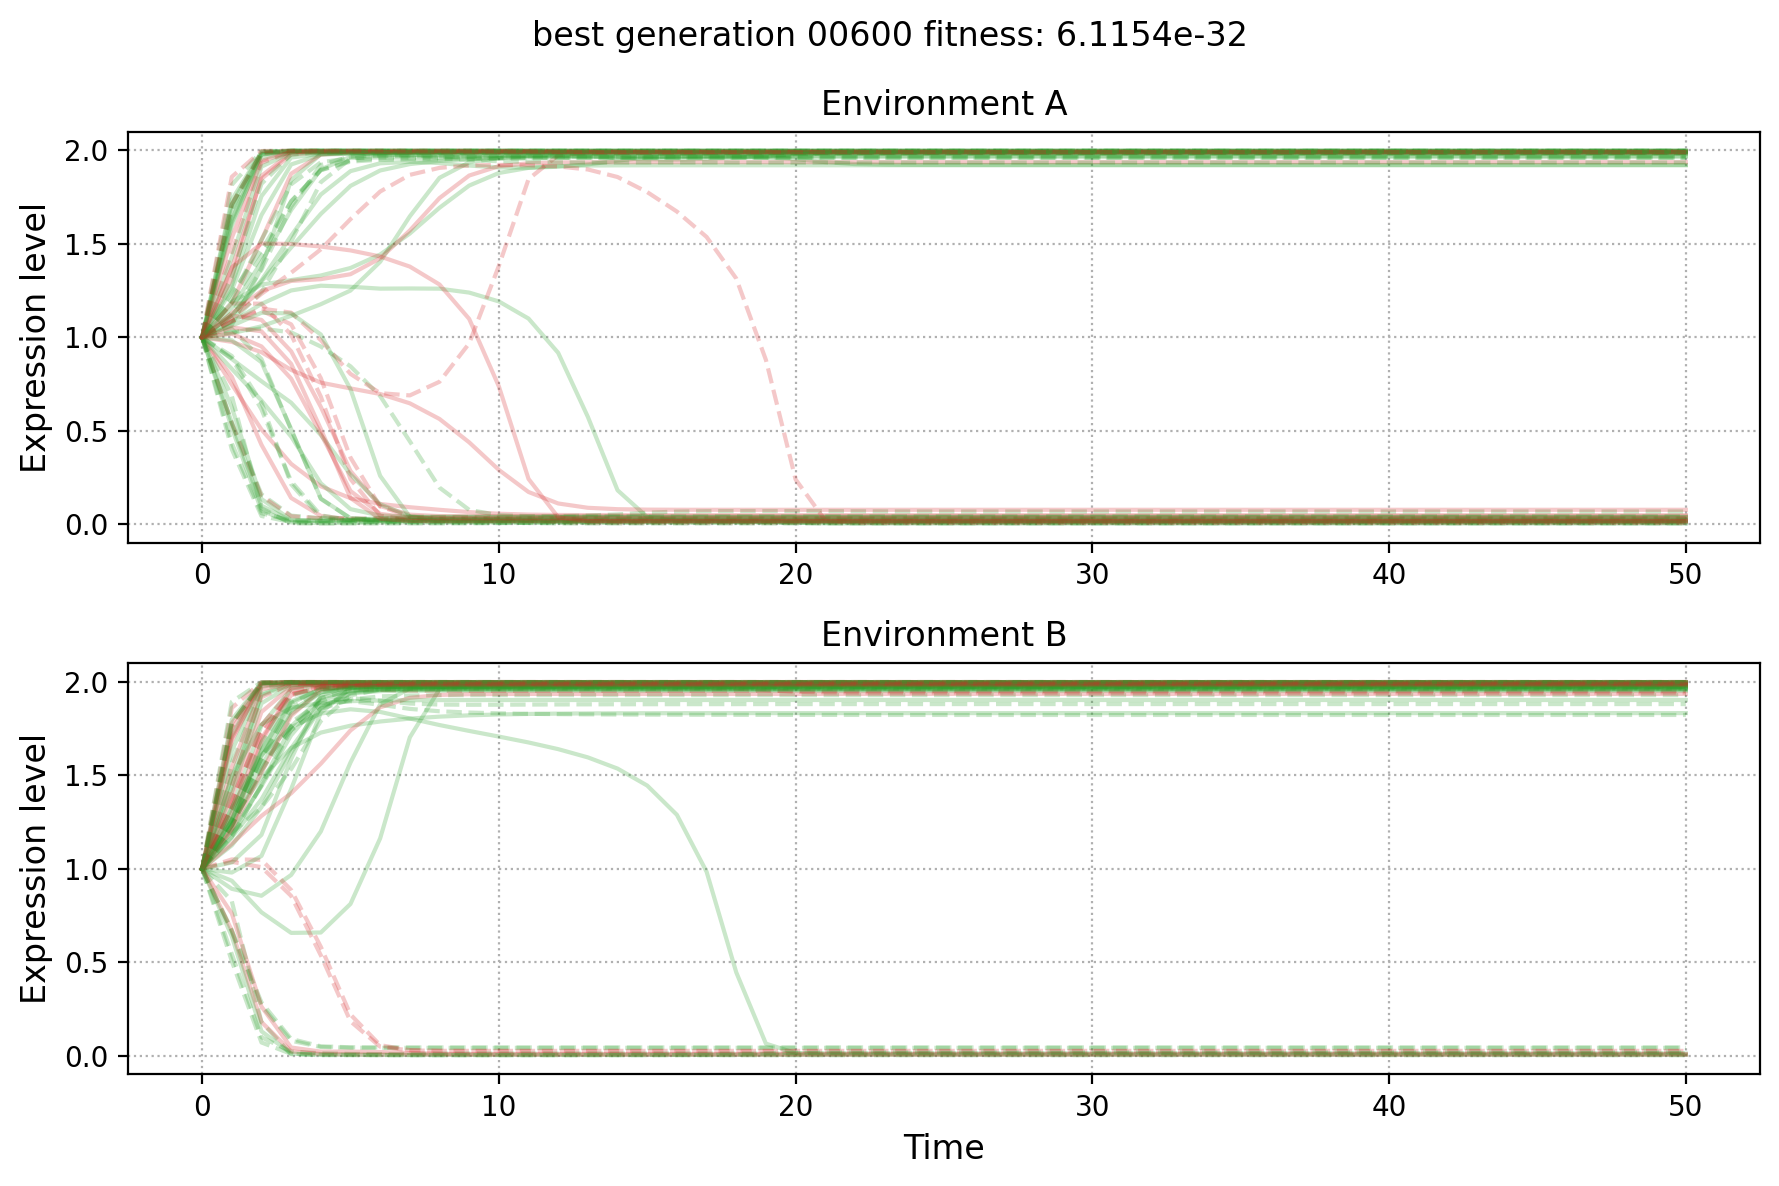

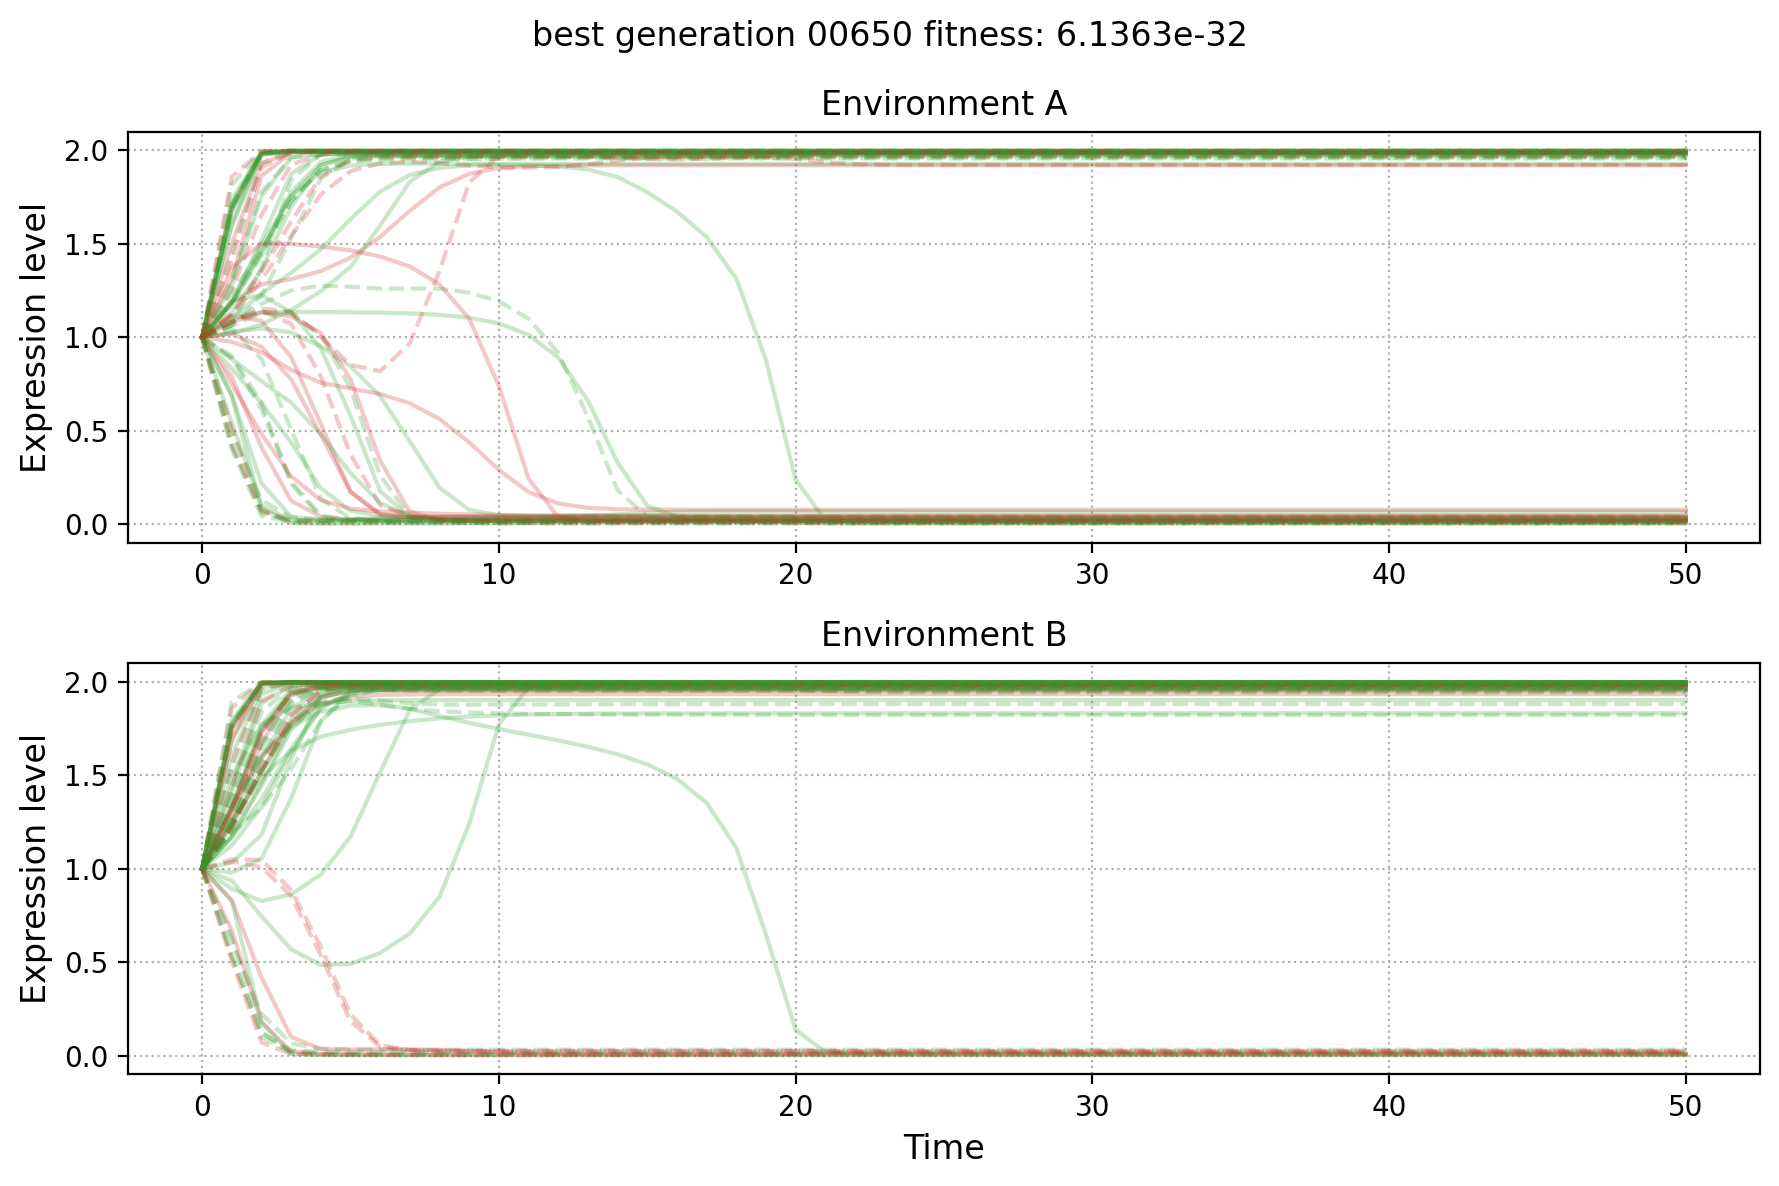

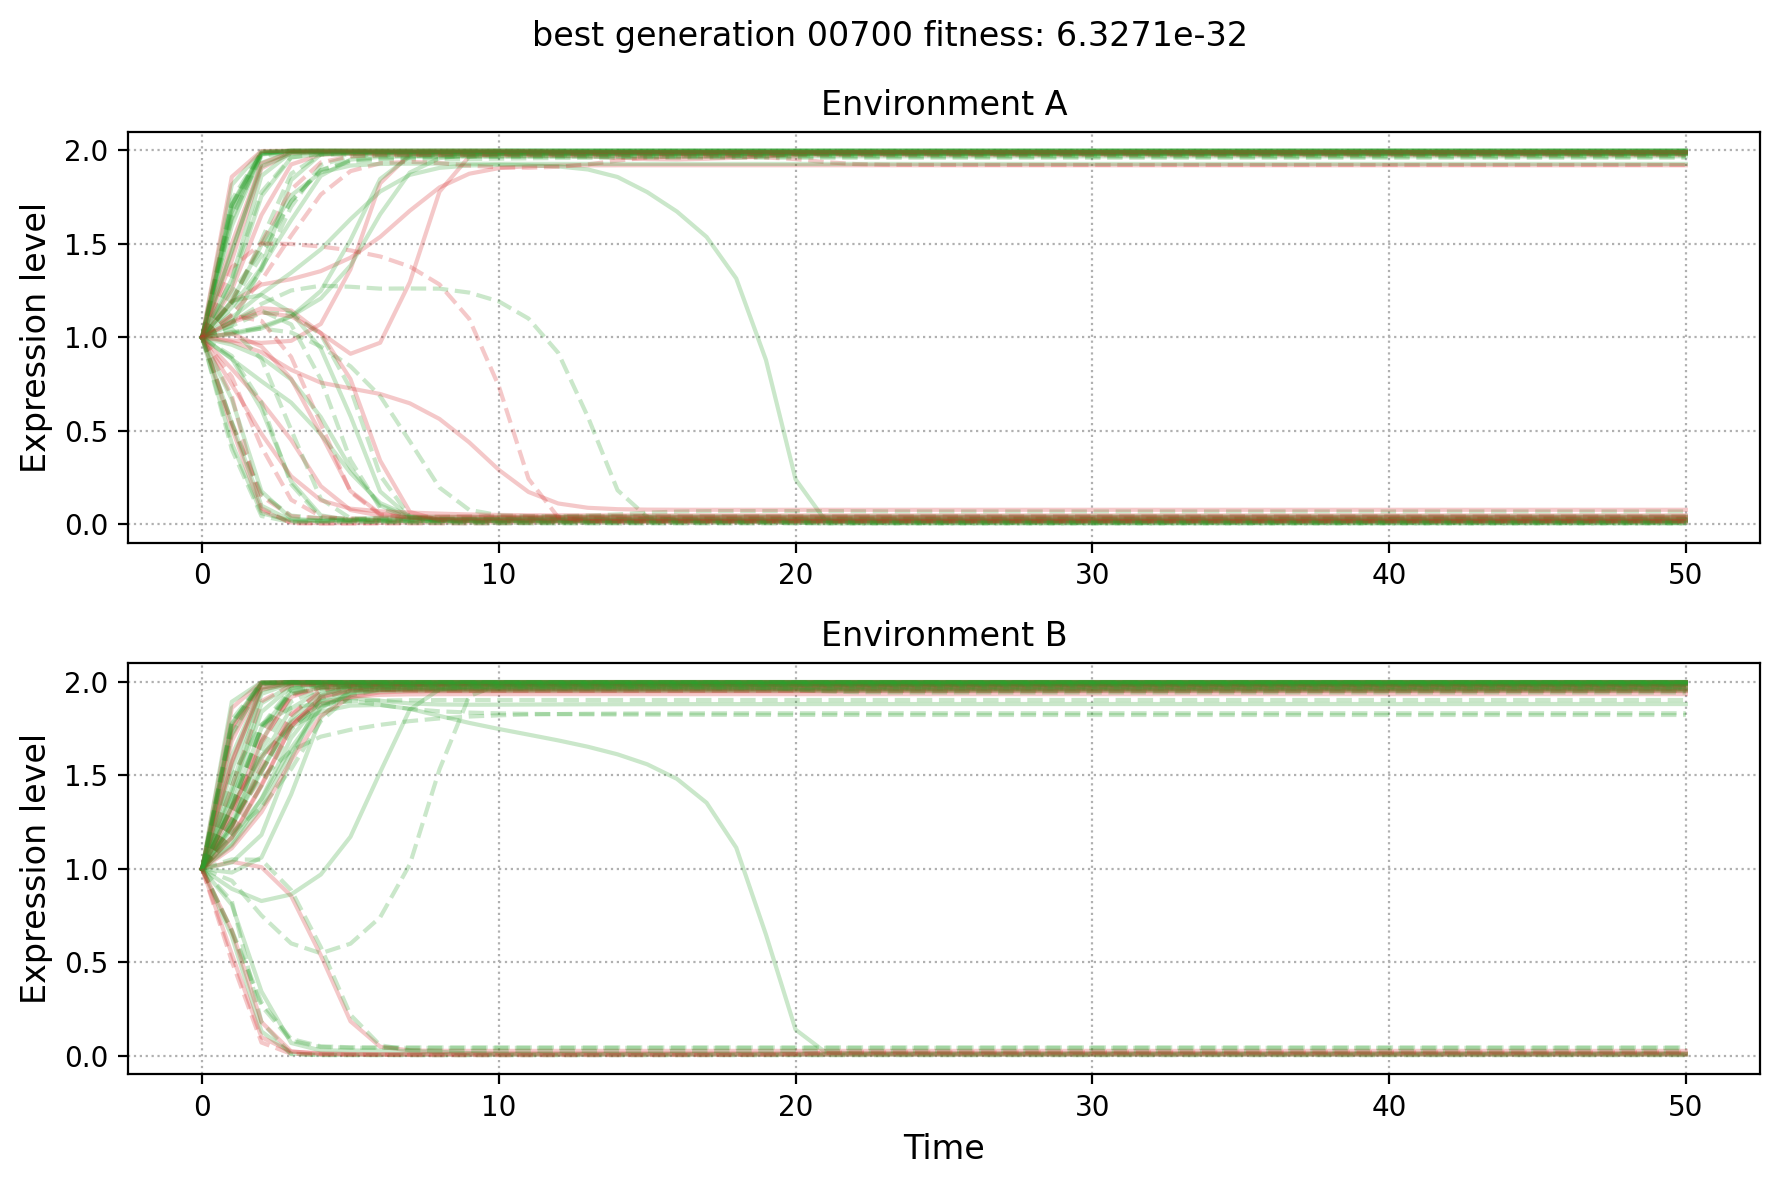

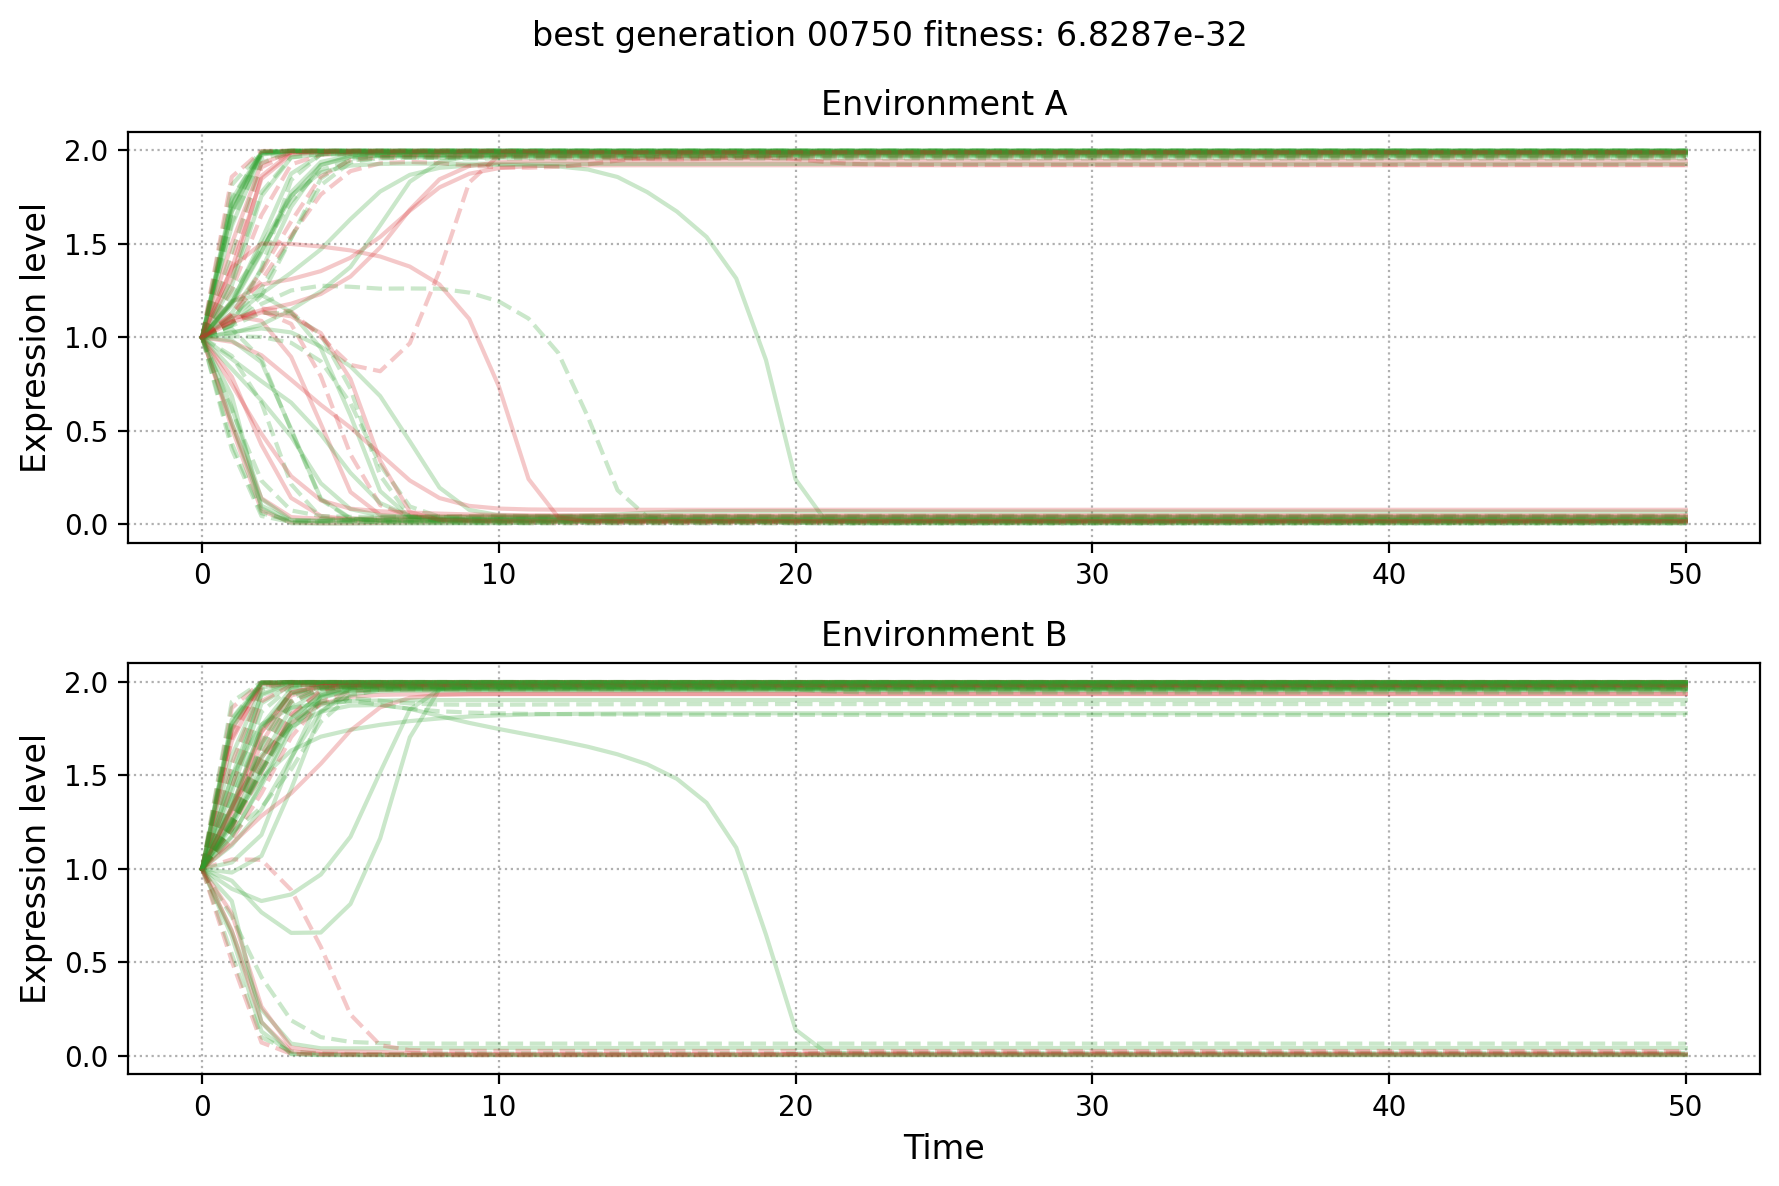

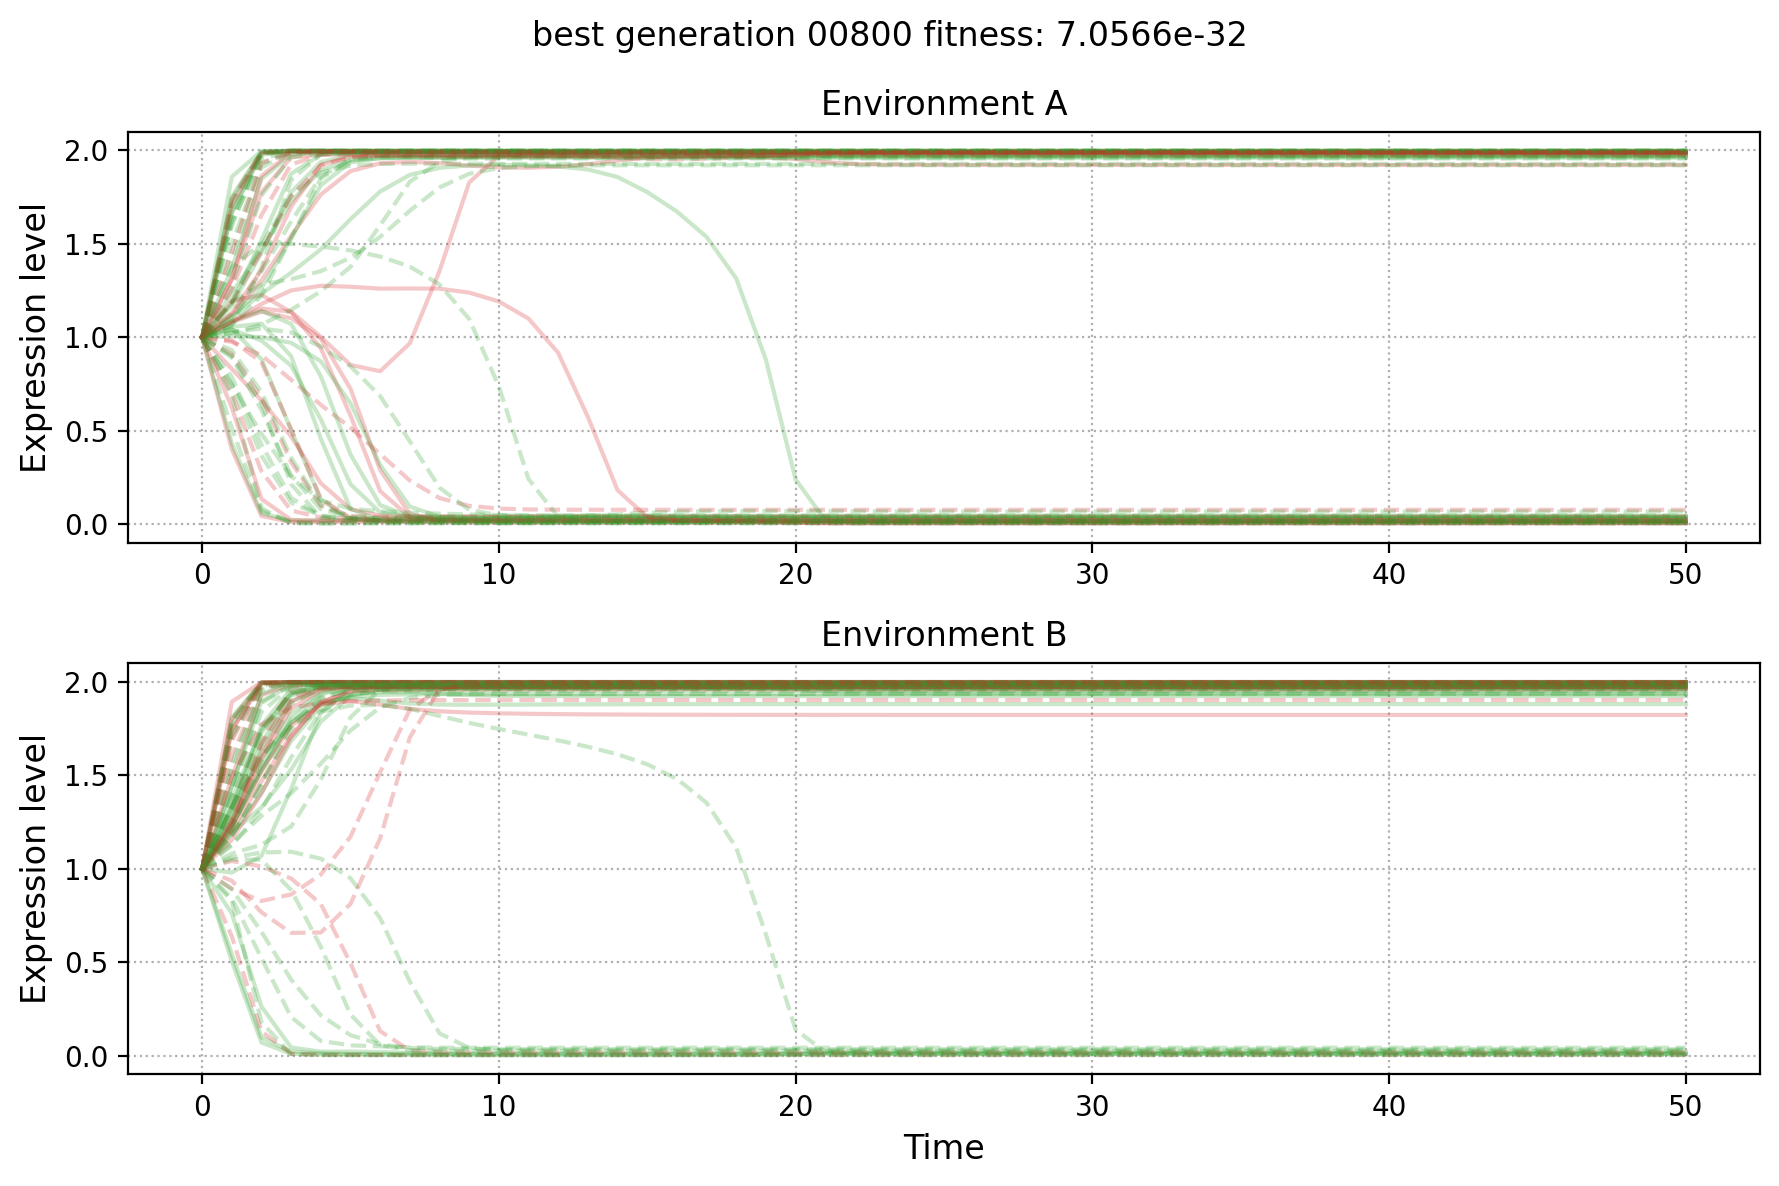

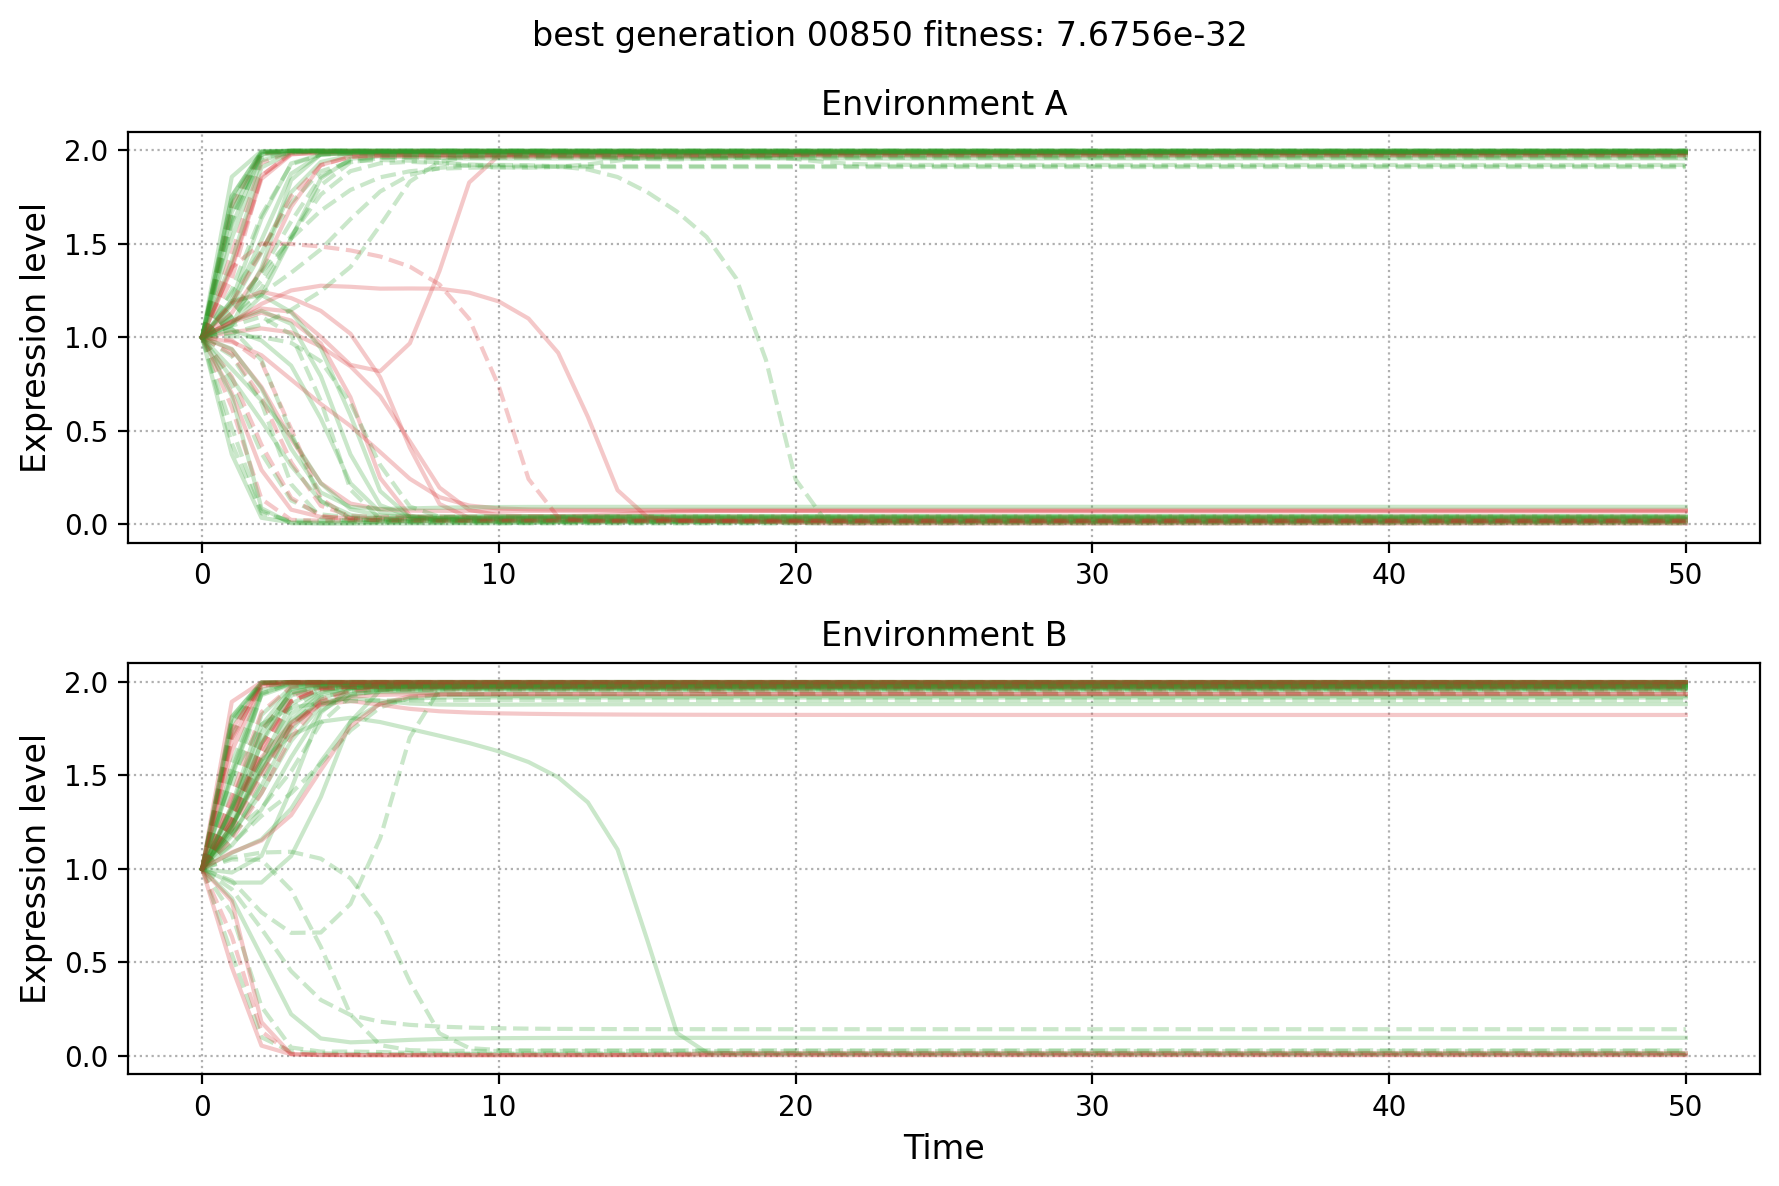

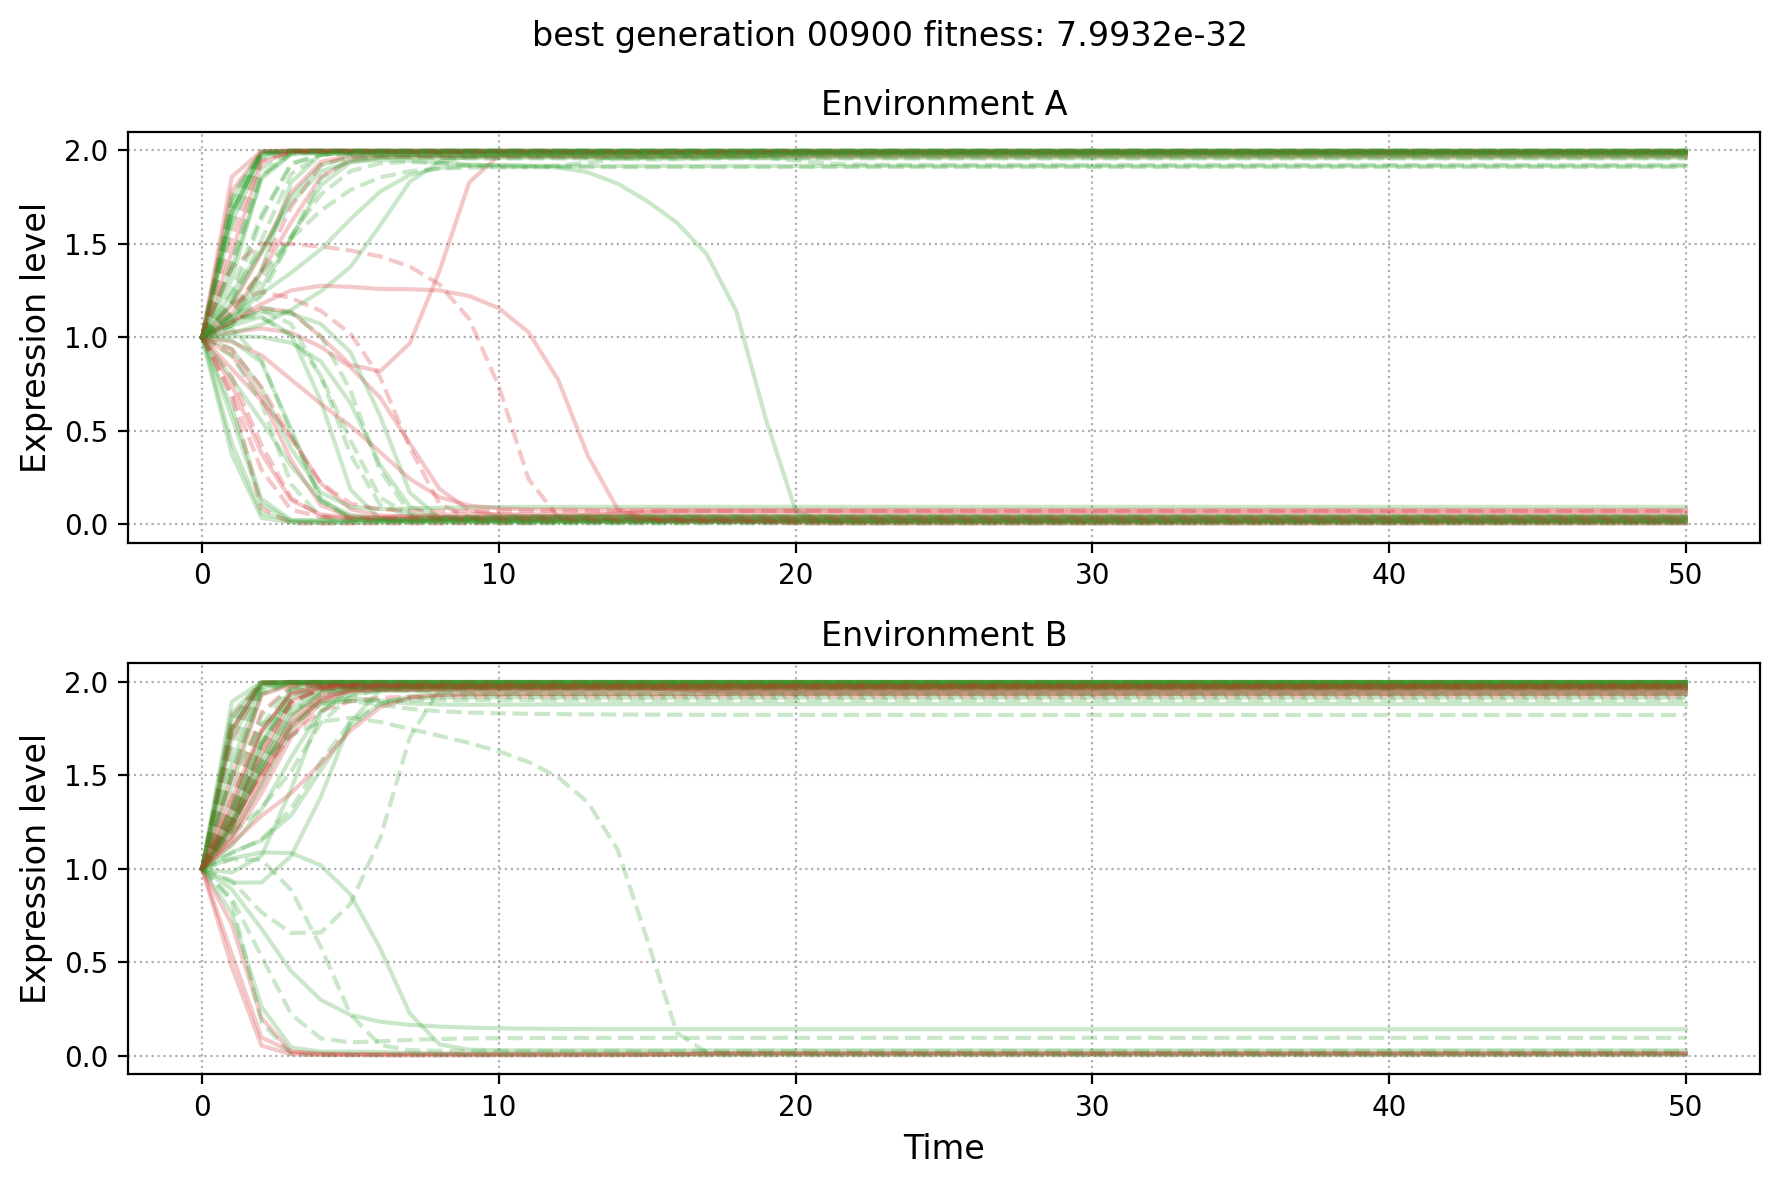

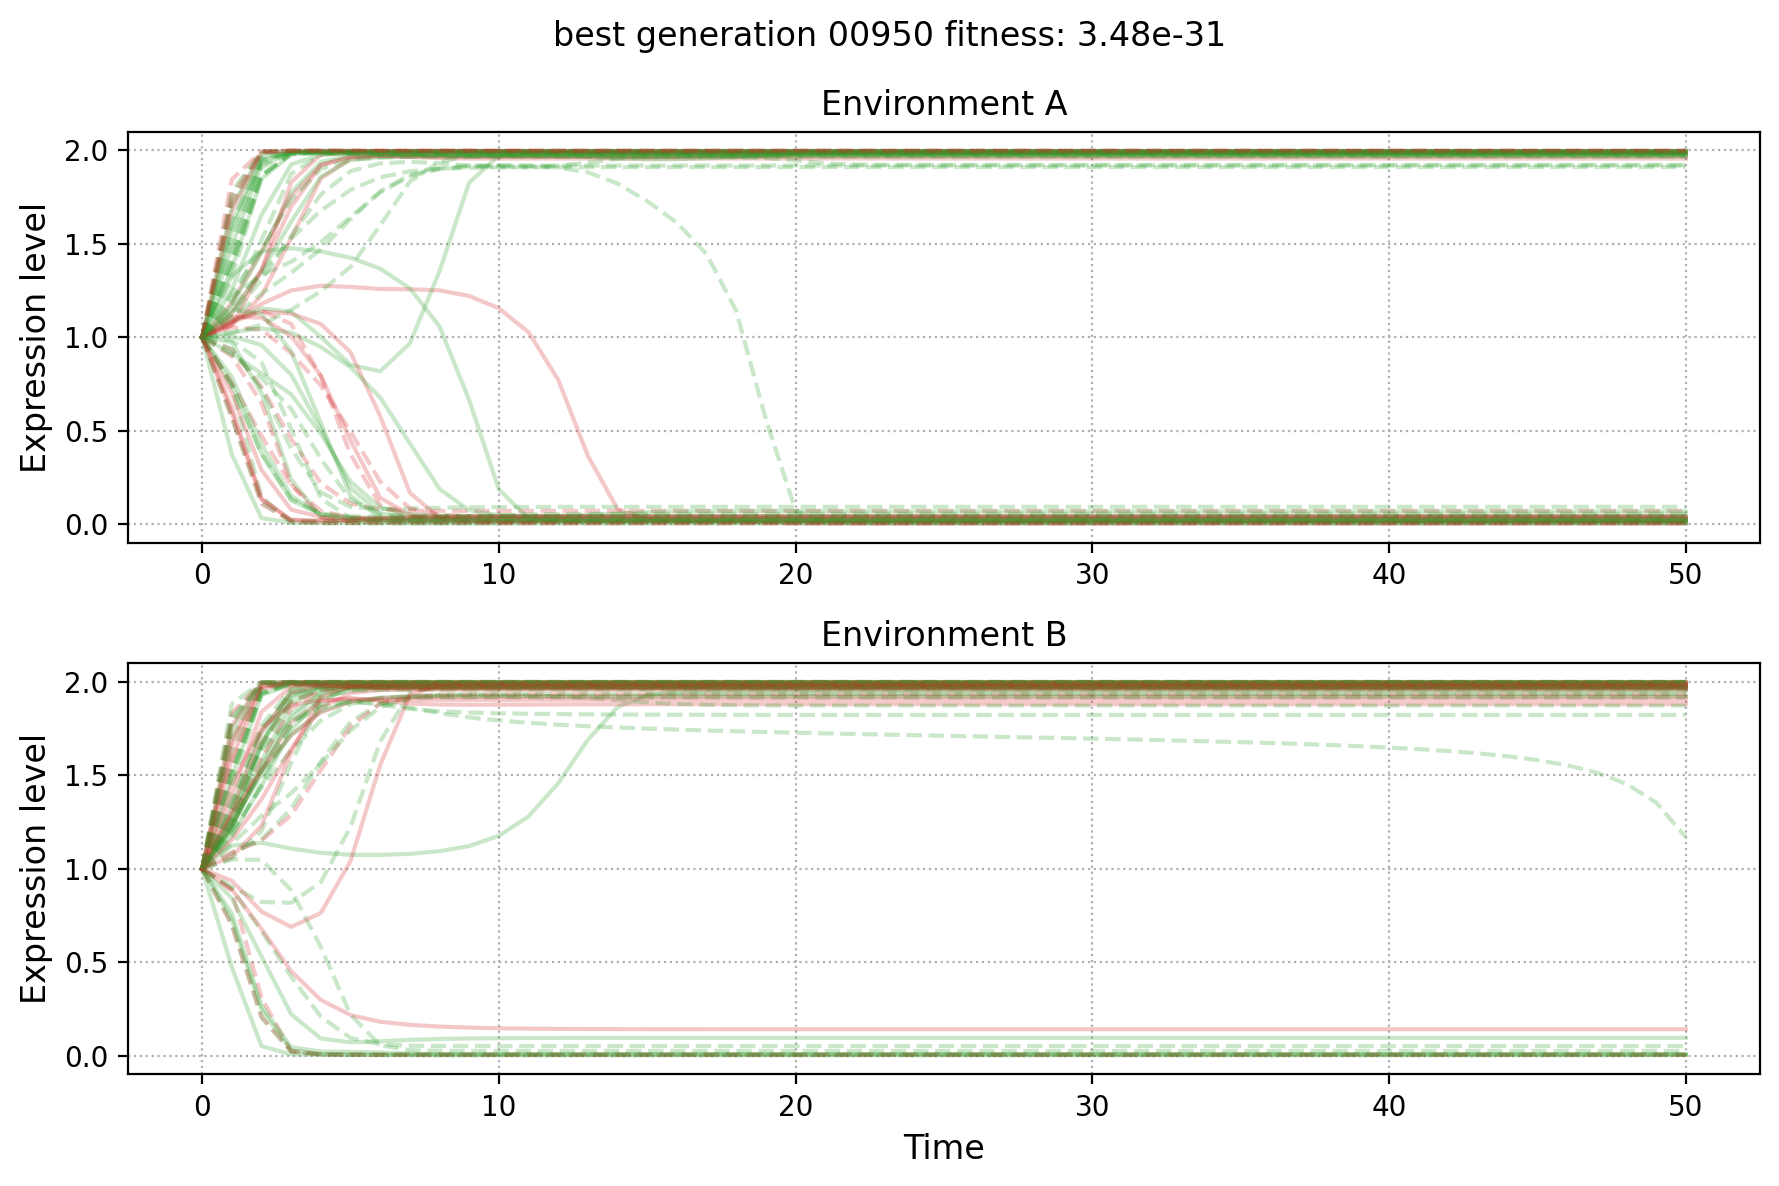

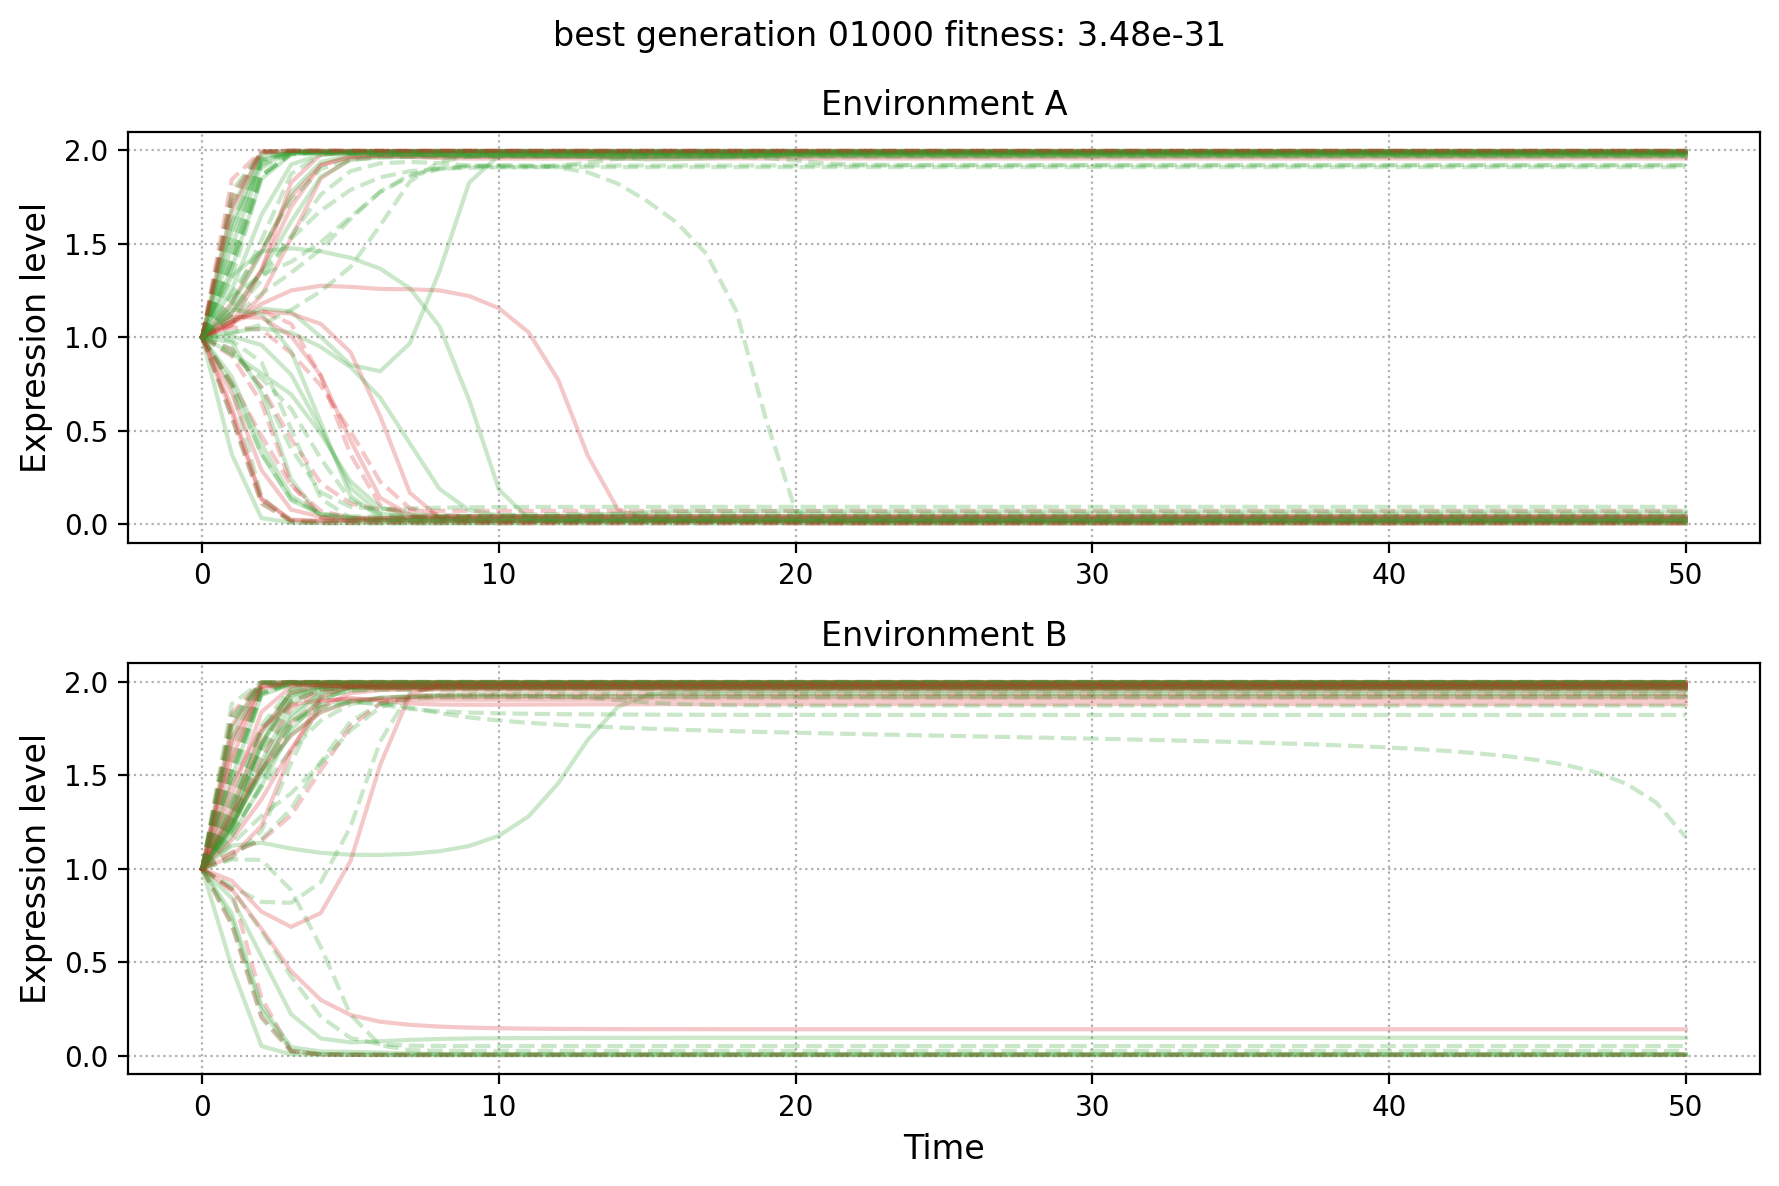

In [11]:
for gen in range(1001):
    best_indiv, avg_fit = population.step()
    
    if gen % 10 == 0:
        print(f'Generation {gen:05}: best fit {best_indiv.fitness:.5}, avg fit {avg_fit:.5}')
    
    if gen % step == 0:
        evotsc_plot.plot_expr_AB(best_indiv, f'best generation {gen:05}', f'best generation {gen:05}.png')
        evotsc_plot.explain(best_indiv)
        print()

In [12]:
last, avg = population.step()

In [13]:
evotsc_plot.explain(last)

Fitness: 3.48e-31
Environment A
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     2 on, 18 off
Environment B
  A & B genes: 20 on, 0 off
  A genes:     10 on, 10 off
  B genes:     20 on, 0 off
